<a href="https://colab.research.google.com/github/JoDeMiro/SACI22/blob/main/SACI22_019.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Források

Kaggle EUR USD Historical Data:
https://www.kaggle.com/imetomi/eur-usd-forex-pair-historical-data-2002-2019

Scikit Learn MLPRegressor:
https://scikit-learn.org/stable/modules/neural_networks_supervised.html

Itt olyan jó leírások vannak ezt be kelett volna tennem a cikkbe.

### Módosítás a SACI22 - 01.ipynb-hez képest

1. nem feltöltéssel rakom fel az adatot
2. a Github repoból szedi le
3. nem a teljes adatsort, hanem egy rövidített változatot (n < 1110)

### Módosítás a SACI22 - 02.ipynb-hez képest

1. Normalizáció (0,1) helyett (-1,1)-re
2. Az mlp súlyait újra lehet inicializálni az `initializer(mlp, factor)` segítségével.
3. Az mlp első illesztésénél teljesen **random** adatokra illesztek az `y_test` helyett.
4. ezek a listák tárolják az evolúció egyes értékeit (csak elezés céljából)
 - generation_holder = [ ]
 - population_holder = [ ]
 - best_indiv_holder = [ ]
 - best_score_holder = [ ]
   <br>
   ezek a listák tárolják az evolúció egyes értékeit (csak elezés céljából)

### Modósítás a SACI22 - 03.ipynb-hez képest
1. Ez csak egy jó futás - működik. A paraméterek miatt fraction = 25
2. Bevezettem az időmérést
3. Bevezettem a plottolásnál a végtelenűl nagy (értelmezhetetlen értékek) szűrését.
4. Ugyan az mint 03 (013) csak a nagyobb adatokon tesztelgetem, hogy mennyire lassul be.
5.  - **BugFix** (valahol van egy nem kezelt randomizáció) <br>
Az első illesztéshez gyártott random változónál volt egy nem kezelt véletlen.

### Modósítás a SACI22 - 04.ipynb-hez képest
1. Visszatérés a rövid adatokhoz (n=1000)
2. Megcsinálja mind a 10 változóra az időablakot, de nem használom
3. Néhány kiegészítő számítás az adatok méretére a cikkhez.
4. Keep_best solution bevezetése.

### Modósítás a SACI22 - 05.ipynb-hez képest
1. Beletettem egy kíséletet, ahol azt csinálom, hogy folyamatosan növelem a neuronok számát és mérem, hogy mennyivel lessz lassabb a futás.

### Modósítás a SACI22 - 06.ipynb-hez képest
1. Az 1 millió adatot tartalmazó filét olvasom be, jelenleg kísérletezem azzal milyen képeket lehetne betenni a cikkbe.
2. - **BugFix** (a mlp setup batch_size=1, miatt lassú az inicializáló fit - átállítottam max-ra

### Modósítás a SACI22 - 18.ipynb-hez képest
1. - **BugFix** (itt található a pontos leírása annak a jelenségnek, hogy azonos Ranodom Number esetén is miért alakul másképp a tanulás különböző méretű populációkban. Nagyon **Fontos** teoretikus írás, ugyanis a jelenség nem hiba.
2. Elkezdtem átírni az `evaluation` függvényt az `Evaluator` osztályba.
3. - **Nagyon Fontos**  mivel a **SACI22** GitHub Projectet áttettem **Private** elérésbe, ezért ebben a Notebookban az adatokat már a másik GitHub Projectből **SACI2022** olvasom be.

### SACI2022K_001
1. - **BugFix** - A Scikit-learn MLPRegressorban eddig csak a coefs_ értékeket módosítottam. A Bias-hoz tartozó súlyok nem kerültek módosításra. Értéküket az inicializálás (init_nn) után nem változtatták. Ez nagyban meghatározta, hogy milyen eredményt érhettek el. Ezen ebben a Notebookban javítottam.

2. - **BugFix** - A fenti probléma több helyen is előfordult ezért javítását több helyen is el kellett végeznem. Egyrészt a `Randomer` osztályt kellett modosítanom, hogy az `mlp.intercepts_` listán is iteráljon végig és végezze el az értékek modosítását. Másrészt az `Evolver` osztályt kellett módosítanom, hogy a megváltoztatott `mlp.intercept_` lista legyen felül írva, ha jobb megoldást talál a korábbinál.

3. Az `Evolver` osztály `run_evolution` metódusa több változó helyett egy dictionary-t ad vissza.

### SACI2022K_003
1. - **Improvement** - A Trader osztályban a calculate metodusban régen egy for ciklussal iteráltam végig a teljes idősoron és számoltam ki a vételi és eladási ár közötti különbségeket. Az egész átkerült Numpy metodusokra amitől sokkal gyorsabb lett, de azért ezteket még ellenőriznem kéne.

2. - **Bug** - A trader eddig a fitness valuet a normált árakon számolta a data_reader.y_train alapján - ami annó kézen fekvő volt, hogy szinkronban legyenek a signál által adott jelek és az árfolyam - de elfelejtettem, hogy ez a normált ár - Alapjaiban nem rendgeti meg a rendszert, de pontosabb lenne, ha a valós ár alapján számolok.

3. **ToDo:** A data_reader tartalmazzon egy y_train többel azonos hosszú és azonos módon indexált adatsort a eredeti árakból amelyken a keresekedést végrehajtom, vagy amelyek alapján a kereskedést elszámolom és ez azalpján lesz majd számolva a fitness value is a Trader osztályban.

4. **ToDo:** A Trader osztály calculate methodusa használja a gyári árat a normalizált ár helyett a fittness kiszámolásához, de miniumum legyen választható beállítás.

5. - DataReader.cut(start, end)

6. - **Depricated:** kivettem a detailed_result változót mert átiratam a programot úgy hogy ezentúl ez a trader.result változóban is el van tárolva ezért két helyen felesleges tárolnom őket.

7. - **Improvement** az NN osztály kapott egy olyan metodust ami képes a Keras által inicializált neurális háló súlyait átvenni és felül írni velük a Scikit neurális háló súlyait, ha azonos az archutektúra aminek ellenőrzése a felhasználó felelősége. `knn_to_snn(kn)` és egy KerasMLP objektumot vár paraméterként.

8. - **Improvement** - a jobb átláthatóság érdekében bele tenni azt is, hogy milyen hosszú egy trade és ebből statisztikát csinálni, hogy lássam átlagosan milyen hosszu ideig tart egy poziicót (Trader osztályba)

9. - **BugFix** - a gain számítását át írtam arra, hogy a vallós áron számolja és ne a normalizált áron.

### SACI2022K_004
1. - **Modificiton** - Csak annyi, hogy a 'fő' programrészt betettem egy függvénybe és a szükséges paramétereketet egy dictionary-ben adom át neki.

### Figyelem

Direkt nem neveztem át a Github repoba kerülő file nevét, hogy ne kelljen a kódon változtatnom, de ez a file az eredeti adatoknak csak egy töredékét tartalmazza.

### Lehetséges ötletek

- **Optional** beletenni, hogy a kötésszámmal arányosan súllyozzon, magyarul büntesse, ha túl sokat köt (Trader osztályon belülre)

<p>&#127947; No skin tone</p>


## Ez cloud init-be megy majd.

In [1]:
# ------------------------------------------------------------------------------

!mkdir input
# !unzip archive.zip -d input
# !wget https://raw.githubusercontent.com/JoDeMiro/SACI22/main/Input/eurusd_minute_1000000.csv.gz     # <-- saját project
!wget https://raw.githubusercontent.com/JoDeMiro/SACI2022/main/Input/eurusd_minute_1000000.csv.gz     # <-- másik project
!mv eurusd_minute_1000000.csv.gz ./input/
!cd input
!gzip -f -d ./input/eurusd_minute_1000000.csv.gz
!rm ./input/eurusd_minute.csv
!mv ./input/eurusd_minute_1000000.csv ./input/eurusd_minute.csv

# ------------------------------------------------------------------------------

mkdir: cannot create directory ‘input’: File exists
--2023-02-13 22:58:52--  https://raw.githubusercontent.com/JoDeMiro/SACI2022/main/Input/eurusd_minute_1000000.csv.gz
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.108.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 12887930 (12M) [application/octet-stream]
Saving to: ‘eurusd_minute_1000000.csv.gz’

eurusd_minute_10000 100%[===================>]  12.29M  --.-KB/s    in 0.08s   

2023-02-13 22:58:52 (154 MB/s) - ‘eurusd_minute_1000000.csv.gz’ saved [12887930/12887930]



In [2]:
import os
import sys
import glob
import keras
import pprint
import sklearn
import ipywidgets
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

from sklearn.neural_network import MLPRegressor

from keras.models import Sequential
from keras.layers import Dense, Activation

from ipywidgets import interact, interactive, fixed, interact_manual, IntSlider, Checkbox
from IPython.display import display

from matplotlib.ticker import StrMethodFormatter

import time
import random
import joblib
from sys import maxsize

print('Python version:{}'.format(sys.version))
print('Numpy version:{}'.format(np.__version__))
print('Pandas version:{}'.format(pd.__version__))
print('Keras version:{}'.format(keras.__version__))
print('Tensorflow version:{}'.format(tf.__version__))
print('Sci-Kit Learn version:{}'.format(sklearn.__version__)) 

2023-02-13 22:58:54.223983: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-02-13 22:58:54.423656: I tensorflow/core/util/util.cc:169] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-02-13 22:58:54.431108: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2023-02-13 22:58:54.431125: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if yo

Python version:3.8.10 (default, Nov 14 2022, 12:59:47) 
[GCC 9.4.0]
Numpy version:1.23.5
Pandas version:1.3.5
Keras version:2.10.0
Tensorflow version:2.10.0
Sci-Kit Learn version:1.0.2


In [3]:
print(os.listdir('./input'))

['eurusd_minute.csv']


## Data Reader Class

In [4]:
import numpy as np
import pandas as pd

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

class DataReader():
  """
  DataReader is responsible for holding, store the data and the basic
  data manipulation.
  """

  def __init__(self, nRowsRead):
    """
    :param nRowsRead: Number of rows read from the csv file via pandas.
    """
    self.nRowsRead = nRowsRead
    self.dataset = None
    self.dataset_full = None
    self.dataset_diff = None
    self.dataset_stacked = None
    self.window = None

# ------------------------------------------------------------------------------

  def load_with_pandas(self, path = './input/eurusd_minute.csv'):
    """
    Load ./input/eurusd_minute.csv int pandas dataframe.
    """
    self.df2 = pd.read_csv(path, delimiter=',', nrows = self.nRowsRead)             # <-- read csv to pandas dataframe
    self.df2.dataframeName = 'eurusd_minute.csv'

    self.n_row, self.n_col = self.df2.shape
    print(f'There are {self.n_row} rows and {self.n_col} columns')                  # <-- print nRow, nCol
    print(self.df2.head(5))                                                         # <-- print head
    self.println()

    return self.df2

# ------------------------------------------------------------------------------

  def cut(self, start: int, end: int):
    """
    Cut or Crop the dataframe.
    """
    self.df2 = self.df2.iloc[start:end, :]    
    print(self.df2.shape)
        
# ------------------------------------------------------------------------------

  def create_dummy(self, length, p):
    """
    Create dummy data
    """
    x = np.arange(0, length, 1)
    s = np.sin(x/180*np.pi*p)

    xs = np.dstack((x,s))
    xs = np.squeeze(xs, axis=0)

    df = pd.DataFrame(xs, columns = ['Date','BC'])
    
    self.df2 = df

# ------------------------------------------------------------------------------
  def info(self):
    """
    Print out the basic information about the loaded dataframe.
    """
    print('Info:')
    print(self.df2.BC.values.ctypes)
    print(self.df2.BC.values.dtype)
    print(self.df2.BC.values.itemsize)
    print(self.df2.BC.values.nbytes)

    print('BC.nbytes =', self.df2.BC.values.nbytes)
    print('BC.nbytes =', self.df2.BC.values.nbytes / 1000, 'Kbyte')
    self.println()

# ------------------------------------------------------------------------------

  def prepare_data(self):
    """
    Perform the necessery data transormation.
    For example: Keep only the BC and the Date columns.
    """
    self.df = self.df2

    # For BC column only
    self.df.set_index(['Date'], inplace=True)              # <-- set index column
    self.data = self.df.filter(['BC'])                     # <-- select only the BC column
    self.dataset = self.data.values                        # --> from pandas.series -> numpy.ndarray
    
    # For all column (I do not use it)
    data_full = self.df.filter(['BO', 'BH', 'BL', 'BC', 'BCh', 'AO', 'AH', 'AL', 'AC', 'ACh'])
    self.dataset_full = data_full.values                   # --> from pandas.series -> numpy.ndarray

# ------------------------------------------------------------------------------

  def create_diff(self, emphasize):
    """
    Create diff n=1.
    """
    close = self.dataset
    diff = np.diff(close[:,0], n=1, prepend=close[0])       # A dataset első oszlpán 
    diff = diff * emphasize                                 # mivel ez pici ért és nem akarom normálni
    diff = diff.reshape(-1, 1)
    plt.plot(diff)
    
    print(close.shape)
    print(diff.shape)
    
    self.dataset_diff = diff
    
    # dstack = np.dstack((close, diff))
    # dstack.shape                            # (10000, 1, 2)

    hstack = np.hstack((close, diff))
    hstack.shape                              # (10000, 2)
    
    self.dataset_stacked = hstack

# ------------------------------------------------------------------------------

  def show_dataset_info(self):
    """
    Print out the basic information about the transformed dataframe.
    """
    self.println()
    print(type(self.dataset))
    print(type(self.dataset_full))
    print(self.dataset.shape)
    print(self.dataset_full.shape)
    self.println()

# ------------------------------------------------------------------------------

  def normalize_values(self):
    """
    Normalize the whole dataframe.
    It transforms the whole dataframe between {-1,+1}.
    """
    
    # Bug:
    # The windowed data should be normalized respectivley, not the whole dataframe.

    self.scaler        = MinMaxScaler(feature_range=(-1, 1))                   # <-- (0, 1) vagy (-1, 1)
    self.dataset       = self.scaler.fit_transform(self.dataset)
    
    self.scaler_full   = MinMaxScaler(feature_range=(-1, 1))                   # <-- (0, 1) vagy (-1, 1)
    self.dataset_full  = self.scaler_full.fit_transform(self.dataset_full)

# ------------------------------------------------------------------------------

  def set_window(self, value: int):
    """
    Set the lookback window size.
    :param value: The lookback period.
    """
    if type(value) is int:
      self.window = value
      print('Set window =', self.window)
    else:
      print('Error: Not proper type of parameter')
    self.println()

# ------------------------------------------------------------------------------

  def backup_y_train_original(self):
    self.y_train_original = self.dataset[self.window:, 0]

# ------------------------------------------------------------------------------

  def create_train_set(self):
    """
    Creates the train and the test dataset.
    """
    self.x_train = []                                                               # <-- Create list of Windows
    self.y_train = []

    for i in range(self.window, len(self.dataset)):
        self.x_train.append(self.dataset[i-self.window:i, 0])
        self.y_train.append(self.dataset[i, 0])

    print('The train dataset {}, and the labels {}'.format(len(self.x_train), len(self.y_train)))

    self.x_train, self.y_train = np.array(self.x_train), np.array(self.y_train)     # <-- Convert list to Numpy Array

    print(self.x_train.shape)
    print(self.y_train.shape)

    print('x_train.nbytes = ', self.x_train.nbytes/1000, 'Kbyte')
    print('x_train.nbytes = ', self.x_train.nbytes/1000/1000, 'Mbyte')

    self.x_train = np.reshape(self.x_train,                                # <-- Nagyon fontos az adatokat az alábbi formában várjuk
                              newshape=(self.x_train.shape[0],
                                        self.x_train.shape[1], 1))         # <-- Reshape (970, 30) -> (970, 30, 1)
    
    print(self.x_train.shape)
    print(self.y_train.shape)
    self.println()

    # --------------------------------------------------------------------------    # <-- ToDo: ezt itt hagyom de nem használom, nem is adom az obj-hez

    x_train_full = []                                                               # <-- Create list of Windows
    y_train_full = []

    for i in range(self.window, len(self.dataset_full)):
        x_train_full.append(self.dataset_full[i-self.window:i, :])
        y_train_full.append(self.dataset_full[i, 0])

    # print('The train dataset {}, and the labels {}'.format(len(x_train_full), len(y_train_full)))

    x_train_full, y_train_full = np.array(x_train_full), np.array(y_train_full)     # <-- Convert list to Numpy Array

    # print(x_train_full.shape)
    # print(y_train_full.shape)

    # print('x_train_full.nbytes = ', x_train_full.nbytes/1000, 'Kbyte')
    # print('x_train_full.nbytes = ', x_train_full.nbytes/1000/1000, 'Mbyte')

# ------------------------------------------------------------------------------

  def println(self):
    print('------------------------------------------------------------------------------')



## Program

There are 20000 rows and 12 columns
         Date   Time      BO      BH      BL      BC  BCh      AO      AH  \
0  2005-01-02  18:29  1.3555  1.3555  1.3555  1.3555  0.0  1.3565  1.3565   
1  2005-01-02  18:38  1.3555  1.3555  1.3555  1.3555  0.0  1.3565  1.3565   
2  2005-01-02  18:51  1.3562  1.3562  1.3562  1.3562  0.0  1.3572  1.3572   
3  2005-01-02  18:52  1.3560  1.3560  1.3560  1.3560  0.0  1.3570  1.3570   
4  2005-01-02  18:55  1.3563  1.3563  1.3563  1.3563  0.0  1.3573  1.3573   

       AL      AC  ACh  
0  1.3565  1.3565  0.0  
1  1.3565  1.3565  0.0  
2  1.3572  1.3572  0.0  
3  1.3570  1.3570  0.0  
4  1.3573  1.3573  0.0  
------------------------------------------------------------------------------
(20000, 12)
Info:
float64
8
160000
BC.nbytes = 160000
BC.nbytes = 160.0 Kbyte
------------------------------------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 2 columns):
 #   Column 

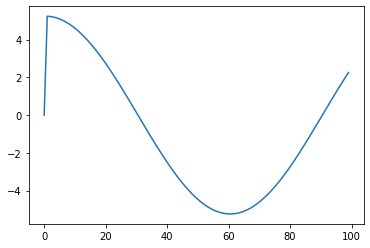

In [5]:
# ------------------------------------------------------------------------------

data_reader = DataReader(nRowsRead=20000)                                        # <-- instantiate DataReader (set number of rows for data)

df2 = data_reader.load_with_pandas(path = './input/eurusd_minute.csv')          # <-- read a particular files from disk (return with df, but also set self)

data_reader.cut(0, 20000)                                                        # <-- cut from to (start, to)

data_reader.info()                                                              # <-- my own info() function

data_reader.create_dummy(100, 3.0)

data_reader.df2.info()                                                          # <-- call pandas built-in info() function

data_reader.prepare_data()                                                      # <-- prepare is setter convert pandas to numpy and set target variable

data_reader.show_dataset_info()

data_reader.backup_y_train_original()

data_reader.create_diff(100)

data_reader.normalize_values()                                                  # <-- transform data between range (-1,1)

data_reader.set_window(10)                                                      # <-- set window size

data_reader.create_train_set()                                                  # <-- prepare egyik legfontossab metódusa (sok transzformációval)



## New

Van egy tök jól összeragsztott adatsorunk is Numpy.Ndarray-ben.

--

Ugyanakkor a dataset-et továbbra is meghagytam egyváltozósnak.

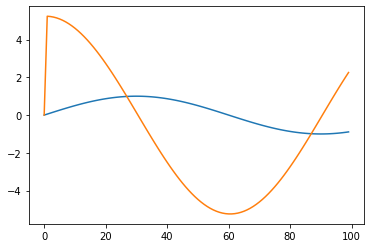

In [6]:
plt.plot(data_reader.dataset_stacked[:,0])
plt.plot(data_reader.dataset_stacked[:,1])

## New

Az y_train peidig így néz most ki.

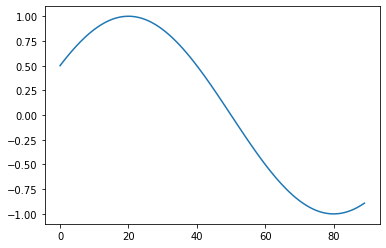

In [7]:
plt.plot(data_reader.y_train)

 A hozzá tartozó x_train pedig így néz ki

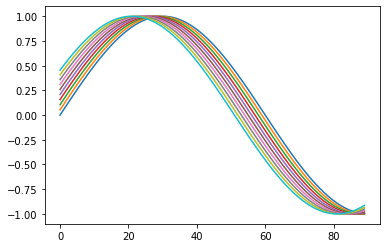

In [8]:
fig, ax = plt.subplots(1, 1)
for i in range(data_reader.x_train.shape[1]):
    ax.plot(data_reader.x_train[:,i,0])

In [9]:
print(data_reader.x_train[:4,0])
print(data_reader.x_train[:4,1])

print(data_reader.x_train.shape)
print(data_reader.x_train[:,0].min())
print(data_reader.x_train[:,0].max())

[[0.        ]
 [0.05233596]
 [0.10452846]
 [0.15643447]]
[[0.05233596]
 [0.10452846]
 [0.15643447]
 [0.20791169]]
(90, 10, 1)
-0.9986295347545738
1.0


### Check Point

Csak a Jupyter Notebookba kerül be a telepített programba nem.


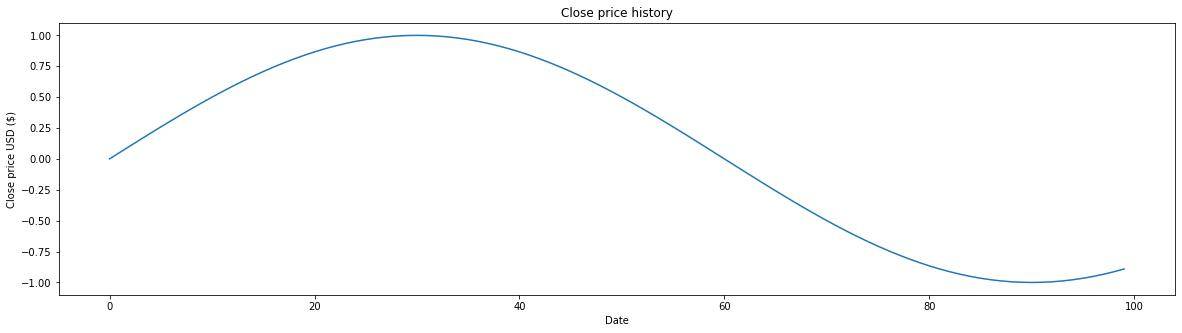

In [10]:
plt.figure(figsize=(20,5))
plt.title('Close price history')
plt.plot(data_reader.dataset)
plt.xlabel('Date')
plt.ylabel('Close price USD ($)')
plt.show()

In [11]:

# ----------------------------------------------------------------------------------

# Segéd függvények a plottoláshoz

# ----------------------------------------------------------------------------------

# ez az új
def plot_trade_adv(trader, trader_signal=None, save=False, j=1, g='', _from=0, _back=0, window=0, step=False):
    '''
    Csak a plottolásért felelős, minden adatot paraméterként kap.
    Semmit nem lát a függvényen kívűl.
    '''
    
    size = trader.data_reader.y_train_original.shape[0]
    start = _from
    end   = size - _back

    fig, ax1 = plt.subplots(figsize=(20, 5))

    ax2 = ax1.twinx()

    # Plot 1
    ax1.plot(trader.data_reader.y_train_original[start+window:end,])

    # Plot 2
    __eq = trader.calculate_equity()

    if step == True:
        plt.plot(__eq[start:end,], color='C1', drawstyle='steps-post', label='Cum Equity steps-post')
    else:
        plt.plot(__eq[start:end,], color='C1', label='Cum Equity')

    ax1.set_xlabel('Date')
    ax1.set_ylabel('Close price USD ($)', color='C0')
    ax2.set_ylabel('Cum. Equity', color='C1')

    plt.title('Close price history with Equity at gen = ' + str(g))
    plt.gca().yaxis.set_major_formatter(
        StrMethodFormatter('{x:,.4f}'))  # 4 decimal places

    chart_y_max = trader.data_reader.y_train_original[start+window:end].max()
    chart_y_min = trader.data_reader.y_train_original[start+window:end].min()
    
    # Buy price
    buy_price_array = np.zeros((trader.data_reader.y_train_original.shape[0]))
    buy_price_array[:] = np.nan
    for i in range(len(trader.result['buy_index'])):
        buy_idx  = int(trader.result['buy_index'][i])
        sell_idx = int(trader.result['sell_index'][i])

        # vertical lines
        if buy_idx >= start and buy_idx <= end:
            ax1.vlines(trader.result['buy_index'][i] - start,
                       chart_y_min,
                       chart_y_max,
                       lw=0.5,
                       ls='dashed',
                       color='black')
        if sell_idx >= start and sell_idx <= end:
            ax1.vlines(trader.result['sell_index'][i] - start,
                       chart_y_min,
                       chart_y_max,
                       lw=0.5,
                       color='black')
        
        # buy_price_array
        buy_price_array[buy_idx:sell_idx+0] = trader.result['buy_price'][i]

    # buy_price_array
    ax1.plot(buy_price_array[start:end], color='black', lw=2, drawstyle='steps-post')


    # Signal
    if isinstance(trader_signal, (np.ndarray, np.generic) ):
        ax3 = ax1.twinx()
        ax3.plot(trader_signal[start:end], color='C2')
        ax3.hlines(trader.threshold, xmin=0, xmax=end-start, lw=0.5, linestyle='dashed', color='black')
        ax3.hlines(trader.th_up, xmin=0, xmax=end-start, lw=0.5, linestyle='dashed', color='C4')
        ax3.hlines(trader.th_dn, xmin=0, xmax=end-start, lw=0.5, linestyle='dashed', color='C5')
        ax3.set_yticks([-1.0, 0, 1.0])
        
    if save == False:
        plt.show()
    
    if save == True:
        plt.savefig('price_{0:04}'.format(j) + '.png')
        plt.close('all')


# ----------------------------------------------------------------------------------


def create_animated_mp4(filter='price*.png', prefix='ani_', framerate=10, quite=True):
    postfix = ' 2> /dev/null' if quite else ''
    output = prefix + filter[0:filter.find('*')] + '.mp4'
    os.system('rm ' + output)
    if (len(glob.glob(filter)) > 0):
        os.system('ffmpeg -r ' + str(framerate) + ' -pattern_type glob -i "' +
                  filter + '" -vcodec libx264 -crf 25 -pix_fmt yuv420p ' +
                  output + postfix)

        print('ok')
    else:
        print('skipped')
        pass

## NN osztály

Ez egy érdekes állat lesz, mert a **Driver** és a **Worker** is használni fogja.



In [12]:
# ------------------------------------------------------------------------------    # <-- NN Class

# Neural Network Class

from warnings import simplefilter
from sklearn.exceptions import ConvergenceWarning

simplefilter(
    "ignore",
    category=ConvergenceWarning)      # <-- kell a Convergencia Warning miatt
simplefilter("ignore")                # <-- a batch_size > n miatt kell ide

import numpy as np
from sklearn.neural_network import MLPRegressor
from copy import deepcopy

# ------------------------------------------------------------------------------


class NN():

    def __init__(self, x_train, y_train):
        self.mlp = None
        self.x_train = np.squeeze(x_train, axis=-1)
        self.y_train = y_train
        self.prediction = None

# ------------------------------------------------------------------------------

    def init_nn(self, _first=15, _second=5, activation='tanh'):
        'Init Scikit Learn MLPRegressor'  # <-- hogy létre jöjjenek a súlyok inicializálni kell

        np.random.seed(1)

        mlp = MLPRegressor(
            hidden_layer_sizes=(_first, _second),
            activation=activation,                     # -------> ha (MinMax(-1,1) vagy StandardScaler())
            solver='sgd',
            batch_size=9900000,         # <<-- v.017 bug fixed
            max_iter=1,                 # <-- sajnos legalább 1 kell hogy legyen
            shuffle=False,
            random_state=1,
            learning_rate_init=
            0.0000000001,               # >- lehetőleg ne tanuljon semmit GD alapján
            validation_fraction=0.0,
            n_iter_no_change=99999999)  # ----->   Behoztam ide az első illesztést is, hogy meglegyenek neki a súlyok

        np.random.seed(1)

        y_random = np.zeros(
            (self.y_train.shape[0])
        ) * 0.0123                      # --> tök random adaton tanítom, hogy még véletlenül se tanuljon

        mlp.fit(
            self.x_train, y_random
        )                               # --> nem akarjuk mi semmire megtanítani csak kell az inithez

        self.mlp = mlp

        return mlp

# ------------------------------------------------------------------------------

    def create_prediction(self):
        'Saját adati alapján csinája meg a predcitiont'

        self.prediction = self.mlp.predict(self.x_train)

        return self.prediction

# ------------------------------------------------------------------------------

    def mlp_reinitalizer(self, fac: float) -> MLPRegressor:

        mlp = deepcopy(self.mlp)

        for i, c in enumerate(mlp.coefs_):
            _ = np.random.rand(c.shape[0], c.shape[1]) * fac                   # uniform
            _ = np.random.normal(0, 1, size=(c.shape[0], c.shape[1])) * fac    # normal
            mlp.coefs_[i] = _

        for i, c in enumerate(mlp.intercepts_):
            if len(c.shape) == 2:
                _ = np.random.rand(c.shape[0], c.shape[1]) * fac
                _ = np.random.normal(0, 1, size=(c.shape[0], c.shape[1])) * fac
            if len(c.shape) == 1:
                _ = np.random.rand(c.shape[0]) * fac
                _ = np.random.normal(0, 1, size=(c.shape[0])) * fac

            mlp.intercepts_[i] = _
        
        self.mlp = deepcopy(mlp)        # felül csapom az initializált mlp-ta

        return mlp

# ------------------------------------------------------------------------------

    def knn_to_snn(self, kn):
        'keras model to scikit model'

        'természetesen csak regressziós és fc modellekre'

        _weights = []
        _biases  = []

        weights = kn.mlp.get_weights()
        for i in range(len(weights)):
            if i % 2 == 0:
                _w = weights[i].astype('float64')
                _weights.append(_w)
            if i % 2 == 1:
                _b = weights[i].astype('float64')
                _biases.append(_b)
        
        self.mlp.coefs_ = _weights
        self.mlp.intercepts_ = _biases

        return _weights, _biases

# ------------------------------------------------------------------------------

In [13]:
# ------------------------------------------------------------------------------    # <-- NN Class

# Neural Network Keras Class

from sklearn.neural_network import MLPRegressor

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation

# ------------------------------------------------------------------------------


class KerasMLP():

    def __init__(self, x_train, y_train):
        self.mlp = None
        self.x_train = x_train
        self.y_train = y_train
        self.prediction = None
        tf.random.set_seed(1)

# ------------------------------------------------------------------------------

    def init_nn(self, _first=15, _second=5, activation='tanh'):
        'Init Keras MLP'  # <-- hogy létre jöjjenek a súlyok inicializálni kell

        np.random.seed(1)

        _input_shape = self.x_train.shape[1]  # <----------------------ezzel lesznek gondok, ha majd az indiket is hozzáadom

        mlp = Sequential()
        mlp.add(Dense(_first, input_shape=(_input_shape, ), activation=activation))
        mlp.add(Dense(_second, activation=activation))
        mlp.add(Dense(1))

        # ----->   Behoztam ide az első illesztést is, hogy meglegyenek neki a súlyok

        np.random.seed(1)

        y_random = np.zeros(
            (self.y_train.shape[0])
        ) * 0.0123  # --> tök random adaton tanítom, hogy még véletlenül se tanuljon

        mlp.compile(
            optimizer=tf.keras.optimizers.SGD(learning_rate=0.0000001),
            loss='mean_absolute_error')

        history = mlp.fit(
            self.x_train,
            y_random,  # --> y_random és nem self.y_train, hogy véletlen adatokra illeszen
            epochs=1,
            shuffle=False,
            verbose=0,
            validation_split=0)

        self.mlp = mlp

        return mlp


# ------------------------------------------------------------------------------

    def create_prediction(self, batch_size):
        'Saját adatai alapján csinája meg a predcitiont'

        self.prediction = self.mlp.predict(self.x_train, batch_size=batch_size).flatten()
        
        return self.prediction

# ------------------------------------------------------------------------------


## Program

In [14]:
# ------------------------------------------------------------------------------

# Scikit
nn = NN(x_train = data_reader.x_train, y_train = data_reader.y_train)

nn.init_nn(_first = 15, _second = 5, activation='tanh')

# nn.mlp.coefs_                                                                     # <-- ha debuggolni kell

# ------------------------------------------------------------------------------

# Keras
kn = KerasMLP(x_train = data_reader.x_train, y_train = data_reader.y_train)

kn.init_nn(_first = 15, _second = 5, activation='tanh')

# kn.mlp.get_weights()                                                              # <-- ha debuggolni kell

# ------------------------------------------------------------------------------

2023-02-13 22:58:57.678096: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2023-02-13 22:58:57.678127: W tensorflow/stream_executor/cuda/cuda_driver.cc:263] failed call to cuInit: UNKNOWN ERROR (303)
2023-02-13 22:58:57.678161: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (jupyter): /proc/driver/nvidia/version does not exist
2023-02-13 22:58:57.678504: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [15]:
# ------------------------------------------------------------------------------

# Create Prediction Scikit

# Tulikép 3 féle módon csinálom meg ugyan azt a becslést

# Azt azért jó lenne belátni, hogy ebből csak egyik félét kéne használni

mlp = nn.mlp

test_pred = mlp.predict(data_reader.x_train[:,:,0])                                 # teszt pred --> semmire nem fogjuk használni

print(test_pred[0:5])

test_pred = nn.mlp.predict(data_reader.x_train[:,:,0])                              # init után direktben is el lehet érni az mlp.predict() függvényt

print(test_pred[0:5])

test_pred = nn.create_prediction()                                                  # csináltam neki egy saját fügvényt ami elvégzi az egész predictiont

print(test_pred[0:5])


[-1.61367072 -1.66309766 -1.71419674 -1.76619238 -1.81828784]
[-1.61367072 -1.66309766 -1.71419674 -1.76619238 -1.81828784]
[-1.61367072 -1.66309766 -1.71419674 -1.76619238 -1.81828784]


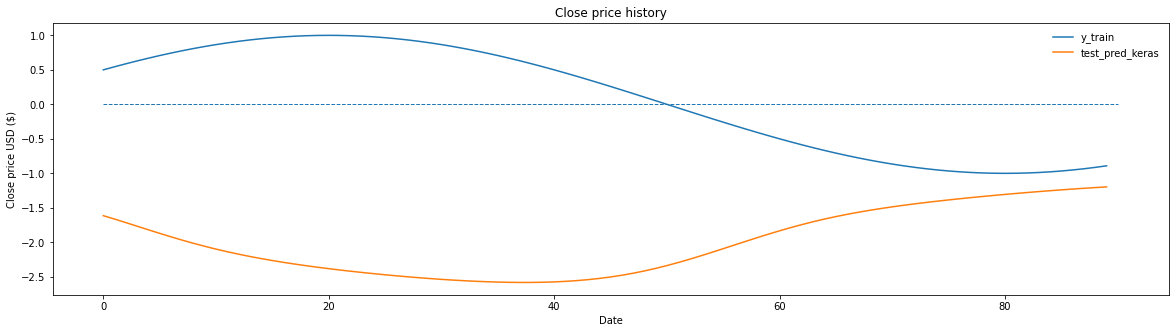

In [16]:
plt.figure(figsize=(20,5))
plt.title('Close price history')
plt.plot(data_reader.y_train, label = 'y_train')
plt.plot(test_pred, label = 'test_pred_keras')
plt.xlabel('Date')
plt.ylabel('Close price USD ($)')
plt.hlines(0.0, 0, data_reader.y_train.size, lw = 1, linestyles='dashed')
plt.legend(frameon=False)
plt.show()

In [17]:
# ------------------------------------------------------------------------------

# Create Prediction Scikit

# Megcsinálom rajta a re-initiallizációt (saját logika alapján osztom ki a súlyokat)

mlp = nn.mlp

mlp = nn.mlp_reinitalizer(0.5)

test_pred = mlp.predict(data_reader.x_train[:,:,0])                                 # teszt pred --> semmire nem fogjuk használni

print(test_pred[0:5])

test_pred = nn.mlp.predict(data_reader.x_train[:,:,0])                              # init után direktben is el lehet érni az mlp.predict() függvényt

print(test_pred[0:5])

test_pred = nn.create_prediction()                                                  # csináltam neki egy saját fügvényt ami elvégzi az egész predictiont

print(test_pred[0:5])


[-1.29650505 -1.38771334 -1.46002975 -1.5127549  -1.54775199]
[-1.29650505 -1.38771334 -1.46002975 -1.5127549  -1.54775199]
[-1.29650505 -1.38771334 -1.46002975 -1.5127549  -1.54775199]


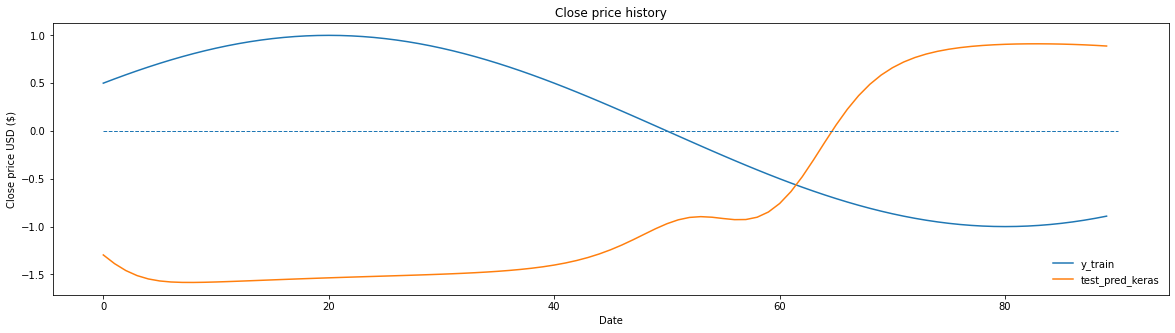

In [18]:
plt.figure(figsize=(20,5))
plt.title('Close price history')
plt.plot(data_reader.y_train, label = 'y_train')
plt.plot(test_pred, label = 'test_pred_keras')
plt.xlabel('Date')
plt.ylabel('Close price USD ($)')
plt.hlines(0.0, 0, data_reader.y_train.size, lw = 1, linestyles='dashed')
plt.legend(frameon=False)
plt.show()

In [19]:
def tensorflow_init_random_seed():

    seed_value = 0
    os.environ['PYTHONHASHSEED'] = str(seed_value)
    random.seed(seed_value)
    np.random.seed(seed_value)
    tf.random.set_seed(seed_value)
    # tf.compat.v1.set_random_seed(seed_value)

In [20]:
# ------------------------------------------------------------------------------

# Create Prediction Keras

# https://www.tensorflow.org/tutorials/keras/regression

tensorflow_init_random_seed()                                                 # ha megismételhető eredményeket akarok

klp = kn.mlp

BATCH_SIZE = 2000

test_pred = klp.predict(data_reader.x_train, batch_size=BATCH_SIZE).flatten() # a klp objektumon is el lehet érni

test_pred = kn.create_prediction(BATCH_SIZE)                                  # a KerasNN-nek is csináltam egy predict függvényt (ugyan az mint a fenti)

print(test_pred[0:5])


1/1 [==============================] - 0s 19ms/step
[-0.3041508  -0.2979504  -0.29071963 -0.28266507 -0.27397892]


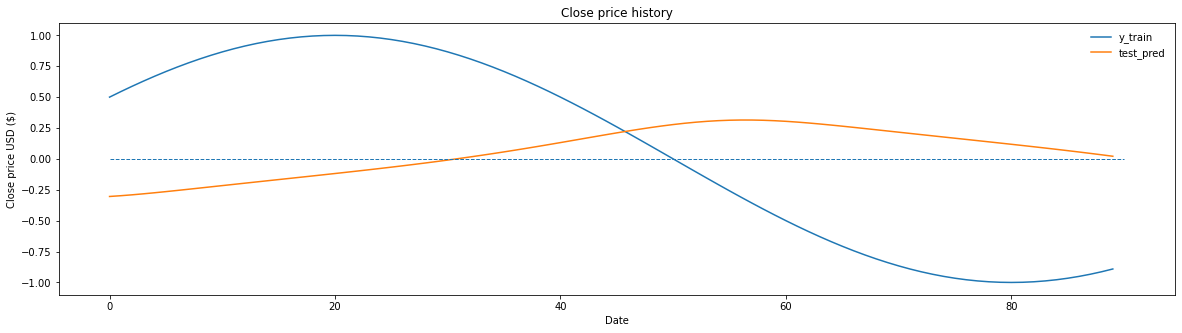

In [21]:
plt.figure(figsize=(20,5))
plt.title('Close price history')
plt.plot(data_reader.y_train, label = 'y_train')
plt.plot(test_pred, label = 'test_pred')
plt.xlabel('Date')
plt.ylabel('Close price USD ($)')
plt.hlines(0.0, 0, data_reader.y_train.size, lw = 1, linestyles='dashed')
plt.legend(frameon=False)
plt.show()

In [22]:
# ------------------------------------------------------------------------------

# Reinitialize Scikit model by Keras model

# Megcsinálom rajta a re-initiallizációt (a keras model alapján osztom ki a súlyokat)

# A lényeg, hogy ez egy Scikit MLPRegressor mégis ugyan a súlyszerkezete mint annak
# a hálónak amit a Kerasban inicializáltam, mert átimportáltam a súlyokat.

mlp = nn.mlp

nn.knn_to_snn(kn)

test_pred = mlp.predict(data_reader.x_train[:,:,0])                                 # teszt pred --> semmire nem fogjuk használni

print(test_pred[0:5])

test_pred = nn.mlp.predict(data_reader.x_train[:,:,0])                              # init után direktben is el lehet érni az mlp.predict() függvényt

print(test_pred[0:5])

test_pred = nn.create_prediction()                                                  # csináltam neki egy saját fügvényt ami elvégzi az egész predictiont

print(test_pred[0:5])

# ------------------------------------------------------------------------------

# Amúgy a két becslés miután átvittem a súlyokat stimmel

keras_pred  = kn.create_prediction(BATCH_SIZE)
scikit_pred = nn.create_prediction()

ks = zip(keras_pred, scikit_pred)

for i in range(5):
    print(next(ks))

print(keras_pred.dtype)       # <-- float32  keras
print(scikit_pred.dtype)      # <-- float64  scikit

[-0.30415084 -0.29795038 -0.29071961 -0.28266509 -0.27397891]
[-0.30415084 -0.29795038 -0.29071961 -0.28266509 -0.27397891]
[-0.30415084 -0.29795038 -0.29071961 -0.28266509 -0.27397891]
1/1 [==============================] - 0s 18ms/step
(-0.3041508, -0.3041508380475645)
(-0.2979504, -0.2979503840151284)
(-0.29071963, -0.2907196080781313)
(-0.28266507, -0.28266508903983384)
(-0.27397892, -0.2739789084977855)
float32
float64


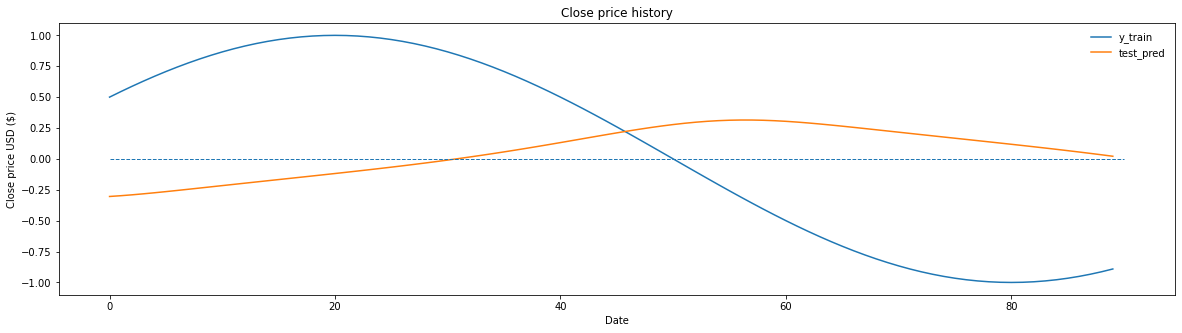

In [23]:
plt.figure(figsize=(20,5))
plt.title('Close price history')
plt.plot(data_reader.y_train, label = 'y_train')
plt.plot(test_pred, label = 'test_pred')
plt.xlabel('Date')
plt.ylabel('Close price USD ($)')
plt.hlines(0.0, 0, data_reader.y_train.size, lw = 1, linestyles='dashed')
plt.legend(frameon=False)
plt.show()

## Trader class

- [x] opcionális lesz, hogy a fitness value-t a normalizált árfolyam vagy a valós árfolyam alapján számolja.
- [x] bevezettem a trader_cost válotzót
- [ ] akdfajdka

## Trader improvement

    a trader calculatorban a for ciklus miatt lassú -> ha átírinám a logikát np.-re



In [24]:
def turn_signal_into_trade_00(signal: np.ndarray, debug=False):
    'Igy kell kiszámolni a tradeket numpy segítségével'
    
    'Ezt a függvényt nem használom, csak emlékbe itt hagyom'
    
    # Az utolsó miníg legyen eladás     <-- csak a backtesthez mert potenciális hiba az élő kereskedésnél
    signal[-1] = -1
    
    # Az első mindíg legyen mesterségese vétel még akkor ha signál valójában nem az, a következő jel
    # eladás akkor gyorsan behuz egy rossz tradet -> ez egy dirty hack de most nem akarok fog. vele
    signal[0] = 1
    
    xx = np.arange(0, signal.shape[0], 1)
    prep_value = -1 if signal[0] > 0 else 1
    dif_signal = np.diff(signal, prepend=prep_value)  # ha az első buy volt akkor +1 ha sell akkor -1

    
    print(signal.shape, dif_signal.shape, xx.shape)
    if debug:
        print('x         ', xx)
        print('signal    ', signal)
        print('dif_signal', dif_signal)
    
    # Hol van az, hogy a signal dif == +2 azaz buy signal
    bidx = np.empty((signal.shape[0]))
    bidx[:] = np.nan
    bidx[dif_signal==+2] = xx[dif_signal==+2]
    if debug: print('buy_idx   ', bidx)
    
    # Hol van az, hogy a signal dif == -2 azaz sell signal
    sidx = np.empty((signal.shape[0]))
    sidx[:] = np.nan
    sidx[dif_signal==-2] = xx[dif_signal==-2]
    if debug: print('sell_idx  ', sidx)
    
    
    ss = sidx[~np.isnan(sidx)]
    bs = bidx[~np.isnan(bidx)]
    
    print('sell_index', ss)
    print('buy_index ', bs)

    return None

In [25]:
signal = np.array([1, 1, 1, 1, -1, -1, -1, -1, -1, 1, 1, -1, 1, 1, -1, 1])

turn_signal_into_trade_00(signal, debug=True)

(16,) (16,) (16,)
x          [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15]
signal     [ 1  1  1  1 -1 -1 -1 -1 -1  1  1 -1  1  1 -1 -1]
dif_signal [ 2  0  0  0 -2  0  0  0  0  2  0 -2  2  0 -2  0]
buy_idx    [ 0. nan nan nan nan nan nan nan nan  9. nan nan 12. nan nan nan]
sell_idx   [nan nan nan nan  4. nan nan nan nan nan nan 11. nan nan 14. nan]
sell_index [ 4. 11. 14.]
buy_index  [ 0.  9. 12.]


In [26]:

# Tesztlegetek pár esetet és ha jónak tűnik akkor beépítem a Traderbe


In [27]:
# eladással kezd

signal = np.array([-1, 1, 1, 1, -1])

turn_signal_into_trade_00(signal)

(5,) (5,) (5,)
sell_index [4.]
buy_index  [0.]


In [28]:
# eladással kezd utána rögtön van egy második eladás

signal = np.array([-1, -1, 1, 1, -1])

turn_signal_into_trade_00(signal)

(5,) (5,) (5,)
sell_index [1. 4.]
buy_index  [0. 2.]


In [29]:
# eladással kezd utána rögtön van két második eladás

signal = np.array([-1, -1, -1, 1, -1])

turn_signal_into_trade_00(signal)

(5,) (5,) (5,)
sell_index [1. 4.]
buy_index  [0. 3.]


In [30]:
# végig csak eladási jelek vannak

signal = np.array([-1, -1, -1, -1, -1])

turn_signal_into_trade_00(signal)

(5,) (5,) (5,)
sell_index [1.]
buy_index  [0.]


In [31]:
# végig csak vételi jelek vannak (buy and hold)

signal = np.array([1, 1, 1, 1, 1])

turn_signal_into_trade_00(signal)

(5,) (5,) (5,)
sell_index [4.]
buy_index  [0.]


In [32]:
# végig csak vételi jelek vannak de az utolsó sell

signal = np.array([1, 1, 1, 1, -1])

turn_signal_into_trade_00(signal)

(5,) (5,) (5,)
sell_index [4.]
buy_index  [0.]


In [33]:
# az első vétel, utána csak eládás

signal = np.array([1, -1, -1, -1, -1])

turn_signal_into_trade_00(signal)

(5,) (5,) (5,)
sell_index [1.]
buy_index  [0.]


In [34]:
# lezárja-e az utolsó tradet, ha nyitva van

signal = np.array([-1, 1, 1, 1, 1])

turn_signal_into_trade_00(signal)

(5,) (5,) (5,)
sell_index [4.]
buy_index  [0.]


In [35]:
# ha egymás után váltogatódnak a signálok

signal = np.array([-1, 1, -1, 1, -1])

turn_signal_into_trade_00(signal)

(5,) (5,) (5,)
sell_index [2. 4.]
buy_index  [0. 3.]


In [36]:
# ha egymás után váltogatódnak a signálok

signal = np.array([1, -1, 1, -1, 1])

turn_signal_into_trade_00(signal)

(5,) (5,) (5,)
sell_index [1. 3.]
buy_index  [0. 2.]


## Trader class


    A fent leírt megoldás jónak tűnik ezért ezt fogom beépíteni a Trader osztály calculator_np osztályba


- [ ] opcionális lesz, hogy a fitness value-t a normalizált árfolyam vagy a valós árfolyam alapján számolja.

In [37]:
data_reader.y_train_original.shape
data_reader.y_train.shape

(90,)

In [38]:
# ------------------------------------------------------------------------------    # <-- Trader Class

# Trader Calculator Class

import numpy as np
import time

class Trader():
    '''
    Trader Class is responsible for ..
    '''

    def __init__(self, threshold, data_reader, trade_cost=0.0001, th=0.0, debug=False):
        '''
        Initialize the class
        :param threshold: Bellow this value the trader sell the security
          Above this value the trader buy the security.
        '''
        self.threshold = threshold
        self.th_up = 0 + th                       # New
        self.th_dn = 0 - th                       # New
        
        self.data_reader = data_reader
        self.window = data_reader.window
        self.debug = debug
        
        self.trade_cost = trade_cost               # New
        
        self.t1 = []
        self.t2 = []
        self.ex = dict()

        self.signal = None
        self.result = dict()
        
        self.hossz = data_reader.y_train.shape[0]
        self.xx = np.arange(0, self.hossz, 1)
        self.buy_idx = np.empty((self.hossz))
        self.sell_idx = np.empty((self.hossz))
        
        print('__init__ Trader')

    def calculator_ff(self, pred: np.ndarray) -> dict:
        '''
        Calculete each trade on the data. It works as a Backtest Engine.
        :param pred: ndarray Predicted value of the Agent. Based on this the function
          calculates the trades and the Equity.
        '''
        begin = time.time()
        
        # A pred mivel mivel annyival rövidebb mint a teljes adatsor mint a window hossza
        # ezért amikor a pred alapján határozom meg a szignált és a szignálhoz tartozó
        # vételi és eladási árakat, továbbá azokat az index értékeket ahol ez az ese-
        # mény bekövetkezik, ezért ennyivel kell kiegészítenem, kitoldanom a pred
        # tömb hosszát
        
        # ad = np.empty((10,))
        # ad[:] = np.nan
        
        # pred = np.concatenate((ad, pred))
        
        # -------------------------------
        
        # Az elképzelés ott hibázott, hogy mivel bizonyos számításokhoz az data_reader.y_train
        # tömböt használom a fenti módszer out_of_index hibára vezetne, mivel a
        # data_reader.y_train tömb is rövidebb mint az eredeti idősor.
        
        # -------------------------------
        
        # Első ránézésre azt tűnik megoldásnak, hogy amikor az index értékét elmentem,
        # akkor készítek egy második tömböt is ami a korrigált, az eredeti idősorhoz
        # visszaigazított index értéket is tartalmazza.
        
        
        buy = pred > self.th_up
        sell = pred < self.th_dn
        
        # ??? nem kell
        # buy[0] = True

        sunique, scounts = np.unique(sell, return_counts=True)
        sell_stat = dict(zip(sunique, scounts))

        bunique, bcounts = np.unique(buy, return_counts=True)
        buy_stat = dict(zip(bunique, bcounts))

        lenght = pred.size

        is_in_trade = False
        is_in_buy = False
        buy_count = 0
        sell_count = 0
        buy_price  = []
        sell_price = []
        buy_index  = []
        sell_index = []
        for i in range(lenght):
            if buy[i] == True and is_in_trade == False:
                buy_count += 1
                # buy_price.append(self.data_reader.y_train[i])         # <-- pisti szomorú ez a normalt ár
                buy_price.append(self.data_reader.y_train_original[self.window:][i]  )# <-- pisti örül ez már eredeti ár
                buy_index.append(i)
                is_in_trade = True

            if sell[i] == True and is_in_trade == True:
                sell_count += 1
                # sell_price.append(self.data_reader.y_train[i])         # <-- normált
                sell_price.append(self.data_reader.y_train_original[self.window:][i])  # <-- eredeti
                sell_index.append(i)
                is_in_trade = False

            if i == lenght - 1 and is_in_trade == True:  # <-- le kell zárni az utolsónál a vételt ha nyitva van
                sell_count += 1
                # sell_price.append(self.data_reader.y_train[i])          # <-- normált
                sell_price.append(self.data_reader.y_train_original[self.window:][i])   # <-- eredeti
                sell_index.append(i)
                is_in_trade = False
                
        
        elapsed_time = time.time() - begin
        self.t1.append(elapsed_time)
        
        # sell_idx és buy_idx alapján megállapítom a trade hosszát
        trade_length = np.array(sell_index) - np.array(buy_index)
        # print('trade_length: ', trade_length)
        
        # gains = np.array(sell_price) - np.array(buy_price)                 # Régi
        gains = np.array(sell_price) - np.array(buy_price) - self.trade_cost # New
        # print(gains)
        
        gain = gains.sum()
        # print(gain)

        
        self.elapsed_time_ff = time.time() - begin

        if (self.debug == True):
            print('Summary :')
            print('buy_stat = ', buy_stat)
            print('sell_stat = ', sell_stat)
            print('buy_count = ', buy_count)
            print('sell_count = ', sell_count)
            print('len(buy_price) = ', len(buy_price))
            print('len(sell_price) = ', len(sell_price))
            print('buy_price  = ', buy_price)
            print('sell_price = ', sell_price)
            print('buy_index  = ', buy_index)
            print('sell_index = ', sell_index)
            # print('gains      = ', gains)
            print('gain       = ', gain)

        self.result = {
            'buy_price': buy_price,
            'sell_price': sell_price,
            'buy_index': buy_index,
            'sell_index': sell_index,
            'trade_length': trade_length
        }

        result = {
            'buy_stat': buy_stat.get(True),
            'sell_stat': sell_stat.get(True),
            'buy_count': buy_count,
            'sell_count': sell_count,
            'gain': gain
        }
        
        return result


    def calculator_np(self, pred: np.ndarray, debug=False) -> dict:
        
        'ha bizonyos feltéel teljesül akkor az első időpillanatba akkor legyen vétel'
        
        begin = time.time()
        
        # Ide az kéne, hogy csak akkor legyen buy vagy sell ha pred<> self.th_up, th_dn
        # buy_sig  = np.zeros((pred.shape))
        # sell_sig = np.zeros((pred.shape))
        self.ex[1] = (time.time()-begin)
        # buy_sig[pred > self.th_up]  = +1
        # sell_sig[pred < self.th_dn] = -1.0
        self.ex[2] = (time.time()-begin)        

#        print('self.th_up', self.th_up)
#        print('self.th_dn', self.th_dn)
#        plt.figure(figsize=(20, 3))
#        plt.plot(buy_sig, label='buy_sig')
#        plt.plot(sell_sig, label='sell_sig')
#        plt.legend(frameon=False)
#        plt.show()
        
        
        # sunique, scounts = np.unique(sell_sig, return_counts=True)
        # sell_stat = dict(zip(sunique, scounts))
        self.ex[3] = (time.time()-begin)

        # bunique, bcounts = np.unique(buy_sig, return_counts=True)
        # buy_stat = dict(zip(bunique, bcounts))
        self.ex[4] = (time.time()-begin)


        buy_o = False
        sell_o = False
        self.ex[5] = (time.time()-begin)
        signal = np.zeros(pred.shape)
        self.ex[6] = (time.time()-begin)
        

        for i, p in enumerate(pred):
            if (buy_o == False and p > self.th_up) or (buy_o == True and p > self.th_dn):
                signal[i] = 1
                buy_o = True
                sell_o = False
            if (sell_o == False and buy_o == True and p < self.th_dn) or (sell_o == True and p < self.th_up):
                signal[i] = -1
                sell_o = True
                buy_o = False
        # ha van nyiott buy akkor zárja le az utolsóval
        if buy_o == True:
            signal[-1] = -1
            buy_o = False
        self.ex[7] = (time.time()-begin)
        
        # self.signal = signal
        
                
#        print(signal)
#        plt.figure(figsize=(20,3))
#        plt.plot(signal, label='signal___')
#        plt.legend(frameon=False)
#        plt.show()
        
        diff = np.diff(signal, prepend=signal[0])
        self.ex[8] = (time.time()-begin)
#       print(diff)

#        plt.figure(figsize=(20,3))
#        plt.plot(diff, label='diff___')
#        plt.legend(frameon=False)
#        plt.show()
        
        buy = np.zeros(pred.shape)
        sell = np.zeros(pred.shape)
        self.ex[9] = (time.time()-begin)
        
        buy.fill(np.nan)
        sell.fill(np.nan)
        # buy[:] = np.nan
        # sell[:] = np.nan
        self.ex[10] = (time.time()-begin)
        
        buy[diff>0] = 1
        sell[diff<0] = 1
        self.ex[11] = (time.time()-begin)
        
        # Ha az utlsó buy volt de le is zárta akkor kell ezt megcsinálni
        if (np.any(signal==1) != True and np.any(signal==-1) == True):
            # nem biztos, hogy az utolsó a ludas de most így hagyom
            print('KUUUUUUUUURVA')
            sell[-1] = np.nan
        
        # Ha az első ponton már van vételi jel akkor legyen a buy ott vétel
        if signal[0] == 1:
            buy[0] = 1
        
#        plt.figure(figsize=(20,3))
#        plt.plot(buy, label='buy')
#        plt.plot(sell, label='sell')
#        plt.legend(frameon=False)
#        plt.show()
        
#        print('buy.shape', buy.shape)
#        print('sell.shape', sell.shape)
#        print('buy.min,max', buy.min(), buy.max())
#        print('sell.min,max', sell.min(), sell.max())
        
        # ___eddig csak a signal (buy,sell) előállításán fáradoztam__most jöhet a price___
        
        # ________________________brand__________________new
        
        # hossz = pred.shape[0]
        # xx = np.arange(0, hossz, 1)

        # Hol van az, hogy a buy == 1 azaz buy signal
        # buy_idx = np.empty((self.hossz))                  # <-- ki lett szervezve az initbe
        self.buy_idx = np.empty((self.hossz))
        self.buy_idx[:] = np.nan
        self.buy_idx[buy==1] = self.xx[buy==1]
        self.buy_idx = self.buy_idx[~np.isnan(self.buy_idx)]
        self.buy_idx = self.buy_idx.astype('int')
        # print('buy_idx: ', buy_idx)
        self.ex[12] = (time.time()-begin)
        
        # Hol van az, hogy a sell == 1 azaz sell signal
        # sell_idx = np.empty((self.hossz))                  # <-- ki lett szervezve az initbe
        self.sell_idx = np.empty((self.hossz))
        self.sell_idx[:] = np.nan
        self.sell_idx[sell==1] = self.xx[sell==1]  
        self.sell_idx = self.sell_idx[~np.isnan(self.sell_idx)]
        self.sell_idx = self.sell_idx.astype('int')
        # print('sell_idx: ', sell_idx)
        self.ex[13] = (time.time()-begin)
        
        # buy_idx alapján megállapítom a buy_price értékeket
        buy_price = np.empty((self.hossz))
        buy_price[:] = np.nan
        # buy_price[buy==1] = self.data_reader.y_train[buy==1]           # <-- normalizált ár
        buy_price[buy==1] = self.data_reader.y_train_original[self.window:][buy==1]    # <-- eredeti ár
        buy_price = buy_price[~np.isnan(buy_price)]
        # print('buy_price: ', buy_price)
        self.ex[14] = (time.time()-begin)

        # sell_idx alapján megállapítom a sell_price értékeket
        sell_price = np.empty((self.hossz))
        sell_price[:] = np.nan
        # sell_price[sell==1] = self.data_reader.y_train[sell==1]        # <-- normalizált ár
        sell_price[sell==1] = self.data_reader.y_train_original[self.window:][sell==1] # <-- eredeti ár
        sell_price = sell_price[~np.isnan(sell_price)]
        # print('sell_price: ', sell_price)
        self.ex[15] = (time.time()-begin)
        
        # print('buy_idx  ', buy_idx)
        # print('sell_idx ', sell_idx)
        
        # sell_idx és buy_idx alapján megállapítom a trade hosszát
        trade_length = self.sell_idx - self.buy_idx
        # print('trade_length: ', trade_length)
        self.ex[16] = (time.time()-begin)
        
        buy_count = buy_price.shape[0]
        sell_count = sell_price.shape[0]
        self.ex[17] = (time.time()-begin)
        

        # van gond, ha a két tömb nem egyenlő hosszú 
        if ( buy_price.shape != sell_price.shape):
            print('      buy_price, ', buy_price)
            print('      sell_price,', sell_price)
            print('buy_count = ', buy_count)
            print('sell_count = ', sell_count)
            print('len(buy_price) = ', len(buy_price))
            print('len(sell_price) = ', len(sell_price))
            print('buy_price  = ', buy_price)
            print('sell_price = ', sell_price)
            print('buy_index  = ', self.buy_idx)
            print('sell_index = ', self.sell_idx)
            print(self.signal)
            print(pred)
            print(diff)
            print(buy)
            print(sell)
            raise Exception('buy_price.shape != sell_price.shape')
            # ggggg
            
        # _______________________________________________end
        
        #____ha a price megvan jöhet a gain kiszámolása
                    
        # gains = np.array(sell_price) - np.array(buy_price)                 # Régi
        gains = np.array(sell_price) - np.array(buy_price) - self.trade_cost # New
        self.ex[18] = (time.time()-begin)
        # print('gains: ', gains)

        gain = gains.sum()
        self.ex[19] = (time.time()-begin)
        
        self.elapsed_time_np = time.time() - begin

        if (self.debug == True):
            print('Summary :')
            # print('buy_stat = ', buy_stat)
            # print('sell_stat = ', sell_stat)
            print('buy_count = ', buy_count)
            print('sell_count = ', sell_count)
            print('len(buy_price) = ', len(buy_price))
            print('len(sell_price) = ', len(sell_price))
            print('buy_price  = ', buy_price)
            print('sell_price = ', sell_price)
            print('buy_index  = ', self.buy_idx)
            print('sell_index = ', self.sell_idx)
            # print('gains      = ', gains)
            print('gain       = ', gain)

        self.result = {
            'buy_price': buy_price,
            'sell_price': sell_price,
            'buy_index': self.buy_idx,
            'sell_index': self.sell_idx,
            'trade_length': trade_length
        }
        self.ex[20] = (time.time()-begin)

        result = {
            # 'buy_stat': buy_stat.get(1.0),
            # 'sell_stat': sell_stat.get(-1.0),
            'buy_count': buy_count,
            'sell_count': sell_count,
            'gain': gain
        }
        self.ex[21] = (time.time()-begin)

        return result


    def calculate_equity(self):
        
        '''
        Elvégzi az Equity kiszámítását a Trader.result alapján
        '''
        # a régi oldsuk ff modelben listáként tér vissza a sell_index meg minden ezért konv ha nem np
        if isinstance(self.result['sell_index'], np.ndarray):
            pass
        else:
            self.result['buy_index'] = np.array(self.result['buy_index'])
            self.result['sell_index'] = np.array(self.result['sell_index'])
            self.result['buy_price'] = np.array(self.result['buy_price'])
            self.result['sell_price'] = np.array(self.result['sell_price'])

        trades_profit_raw = self.result['sell_price'] - self.result['buy_price']
        trades_profit_costs = self.result['sell_price'] - self.result['buy_price'] - self.trade_cost
                
        
        # ------------------------------------------------------------------------------
        # cum profit (equity)

        cum_profit_raw = [0]
        for i in range(len(trades_profit_raw)):
            cum_profit_raw.append(cum_profit_raw[i] + trades_profit_raw[i])       # [0, ., .,]
        
        cum_profit_raw = np.cumsum(trades_profit_raw)                             # [., .,]

        # ------------------------------------------------------------------------------

        # cum profit (equity)

        cum_profit_costs = [0]
        for i in range(len(trades_profit_costs)):
            cum_profit_costs.append(cum_profit_costs[i] + trades_profit_costs[i]) # [0, ., .,]
        
        cum_profit_costs = np.cumsum(trades_profit_costs)                         # [., .,]

        # ------------------------------------------------------------------------------

        eq_raw = np.zeros(data_reader.y_train.shape[0])   # <-- override
        eq_cost = np.zeros(data_reader.y_train.shape[0]) # <-- override

        # utó indexelt ( csak akkor ugrik az equity amikor lezárta )
        for i in range(len(self.result['sell_price'])):
            # sell_index = self.result['sell_index'][i].astype('int')
            sell_index = self.result['sell_index'][i]
            eq_raw[sell_index:] = cum_profit_raw[i]
            eq_cost[sell_index:] = cum_profit_costs[i]

        self.eq_cost = eq_cost
        self.eq_raw = eq_raw
        
        return eq_raw

## Program

In [39]:

TRADE_COST = 0.001
THRESHOLD  = -0.0
TH = 0.2

# ------------------------------------------------------------------------------  # <-- Test Trader Class

# Letesztelem, hogy a felős és alsó threshold alapú kereskedés működik-e

loop_trader = Trader(threshold = THRESHOLD,
                     data_reader = data_reader,
                     trade_cost = TRADE_COST,
                     th = TH,
                     debug=True)

pred = nn.create_prediction()

loop_result = loop_trader.calculator_ff(pred)                                     # <-- Ebben a formában kell majd használni

loop_result.keys()                         # <- get dict.keys
loop_result.get('gain')                    # <- get a value by a given key
loop_result['gain']                        # <- get a value by a given key        # <-- Ebben a formában kell majd használni

print(loop_trader.elapsed_time_ff)
print(loop_result)

__init__ Trader
Summary :
buy_stat =  {False: 63, True: 27}
sell_stat =  {False: 78, True: 12}
buy_count =  1
sell_count =  1
len(buy_price) =  1
len(sell_price) =  1
buy_price  =  [0.25881904510252063]
sell_price =  [-0.8910065241883675]
buy_index  =  [45]
sell_index =  [89]
gain       =  -1.150825569290888
0.0006163120269775391
{'buy_stat': 27, 'sell_stat': 12, 'buy_count': 1, 'sell_count': 1, 'gain': -1.150825569290888}


<class 'numpy.ndarray'>
(90,)


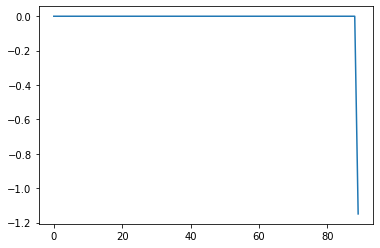

In [40]:
___eq = loop_trader.calculate_equity()

print(type(___eq))
print(___eq.shape)

plt.plot(___eq)

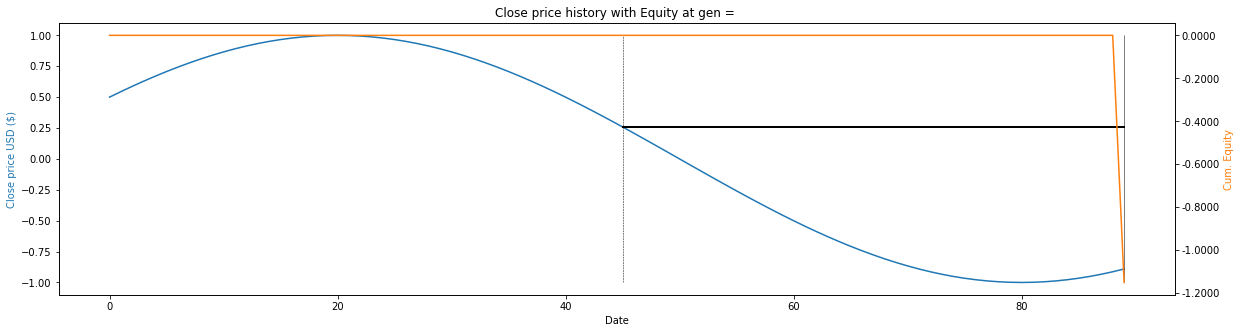

In [41]:
plot_trade_adv(loop_trader, window=loop_trader.window)

Summary :
buy_stat =  {False: 63, True: 27}
sell_stat =  {False: 78, True: 12}
buy_count =  1
sell_count =  1
len(buy_price) =  1
len(sell_price) =  1
buy_price  =  [0.25881904510252063]
sell_price =  [-0.8910065241883675]
buy_index  =  [45]
sell_index =  [89]
gain       =  -1.150825569290888


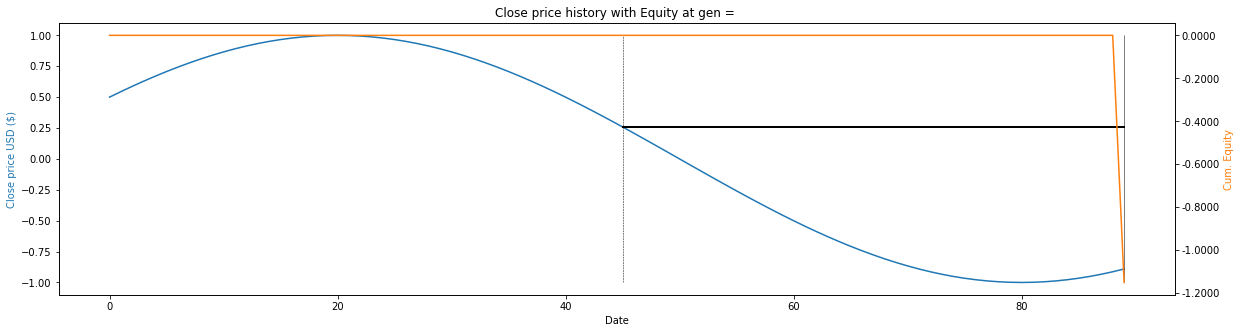

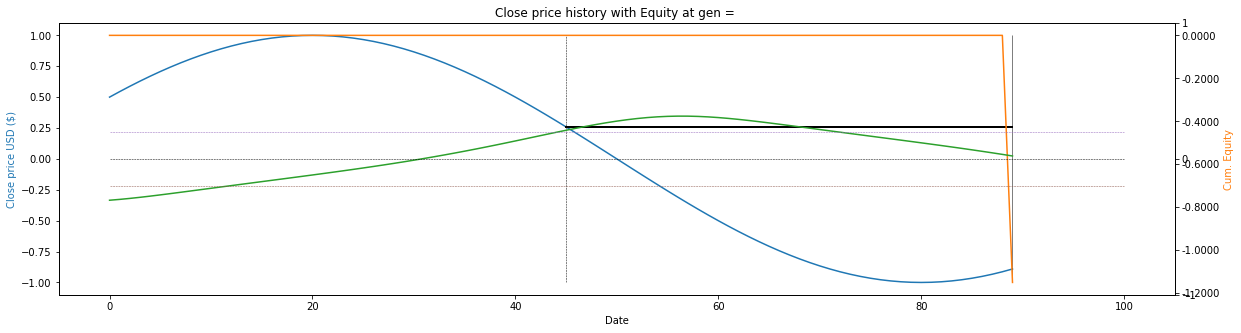

In [42]:
# ha paraméterként megkapja a signált akkor azt is megjeleníti

# window paraméter sem kell neki odaadnom, mert a traderben látja

pred = nn.create_prediction()

loop_trader.calculator_ff(pred)

plot_trade_adv(loop_trader, window=loop_trader.window)

plot_trade_adv(loop_trader, trader_signal=pred, window=loop_trader.window)



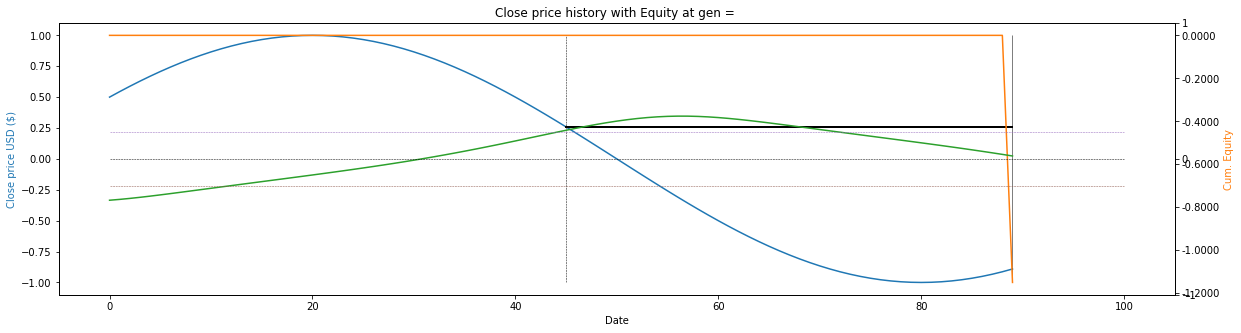

In [43]:
plot_trade_adv(loop_trader, trader_signal=pred, window=loop_trader.window, _from=0, _back=0 )

In [44]:

'Úgy tűnik, hogy a trader.calculate_ff()-en meg tudtam oldani a threshold alapú tradelés'


'Úgy tűnik, hogy a trader.calculate_ff()-en meg tudtam oldani a threshold alapú tradelés'

In [45]:

TRADE_COST = 0.001
THRESHOLD  = -0.0
TH = 0.2

# ------------------------------------------------------------------------------  # <-- Test Trader Class

# Letesztelem, hogy a felős és alsó threshold alapú kereskedés működik-e

np_trader = Trader(threshold = THRESHOLD,
                   data_reader = data_reader,
                   trade_cost = TRADE_COST,
                   th = TH)

pred = nn.create_prediction()

np_result = np_trader.calculator_np(pred)                                         # <-- Ebben a formában kell majd használni

np_result.keys()                         # <- get dict.keys
np_result.get('gain')                    # <- get a value by a given key
np_result['gain']                        # <- get a value by a given key          # <-- Ebben a formában kell majd használni

print(np_result)

print(np_trader.elapsed_time_np)

__init__ Trader
{'buy_count': 1, 'sell_count': 1, 'gain': -1.150825569290888}
0.0002841949462890625


In [46]:
print(np_trader.buy_idx)
print(np_trader.sell_idx)

[45]
[89]


<class 'numpy.ndarray'>
(90,)
-1.149825569290888 0.0


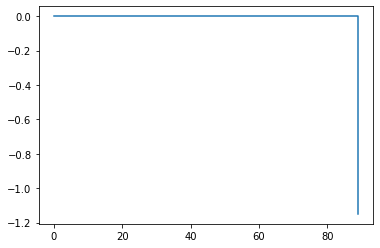

In [47]:
___eq = np_trader.calculate_equity()

print(type(___eq))
print(___eq.shape)
print(___eq.min(), ___eq.max())

plt.figure()
plt.plot(___eq, drawstyle='steps-post')
plt.show()

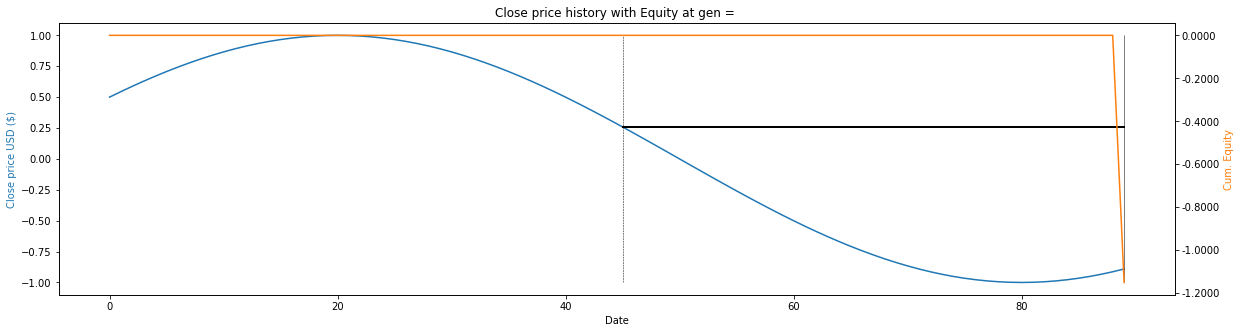

In [48]:
plot_trade_adv(np_trader, window=np_trader.window)

__init__ Trader


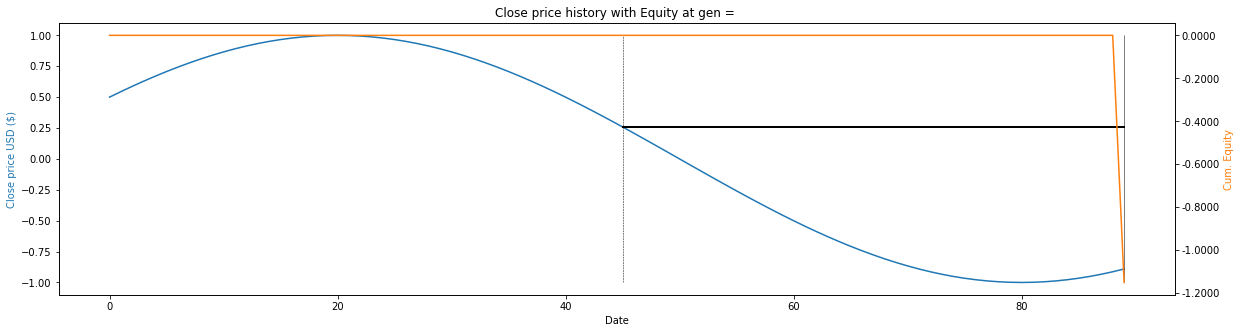

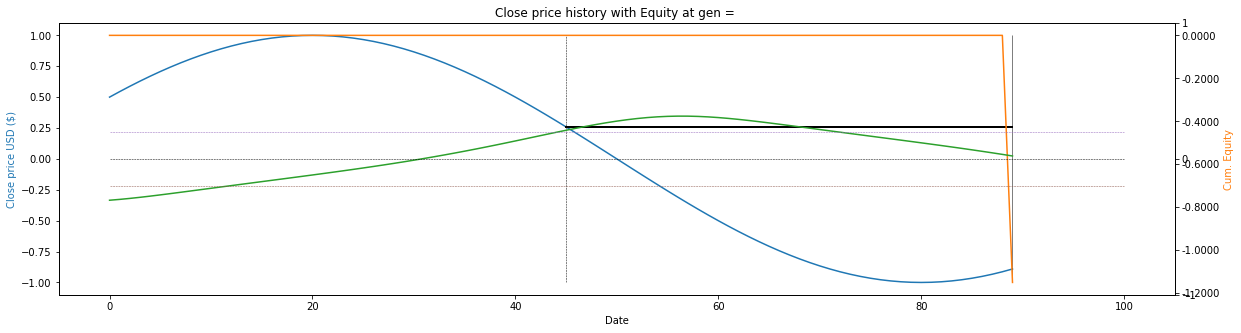

In [49]:
# ha paraméterként megkapja a signált akkor azt is megjeleníti

# window paraméter sem kell neki odaadnom, mert a traderben látja

TRADE_COST = 0.001
THRESHOLD  = -0.0
TH = 0.2

np_trader = Trader(threshold = THRESHOLD,
                   data_reader = data_reader,
                   trade_cost = TRADE_COST,
                   th = TH)


pred = nn.create_prediction()

np_trader.calculator_np(pred)

plot_trade_adv(np_trader, window=np_trader.window)

plot_trade_adv(np_trader, trader_signal=pred, window=np_trader.window)


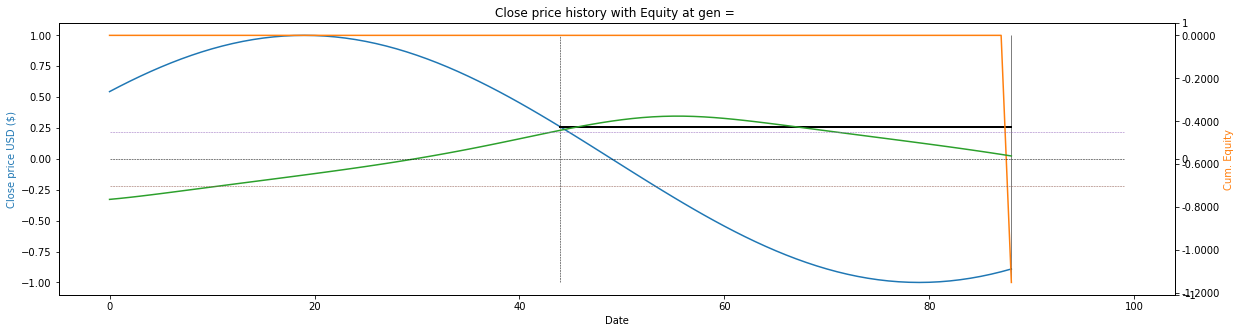

In [50]:
plot_trade_adv(np_trader, trader_signal=pred, window=np_trader.window, _from=1, _back=0 )

In [51]:
print(f'{loop_trader.elapsed_time_ff:.5f}')
print(f'{np_trader.elapsed_time_np:.5f}')
print('-')
# _ = [print(f'{x:.5f}') for x in np_trader.ex.values()]
_ = [print(f'{x} {y:.5f}') for x, y in np_trader.ex.items()]


0.00039
0.00028
-
1 0.00000
2 0.00000
3 0.00000
4 0.00000
5 0.00000
6 0.00000
7 0.00004
8 0.00011
9 0.00011
10 0.00011
11 0.00012
12 0.00017
13 0.00021
14 0.00022
15 0.00023
16 0.00023
17 0.00023
18 0.00027
19 0.00028
20 0.00028
21 0.00029


# A két megoldás | for és np | összehasonlítása

Akkor jó ha azonosak


In [52]:
print(loop_result)
print(np_result)

{'buy_stat': 27, 'sell_stat': 12, 'buy_count': 1, 'sell_count': 1, 'gain': -1.150825569290888}
{'buy_count': 1, 'sell_count': 1, 'gain': -1.150825569290888}


In [53]:
for i in loop_trader.result.keys():
    print(loop_trader.result[i])

[0.25881905]
[-0.89100652]
[45]
[89]
[44]


In [54]:
for i in np_trader.result.keys():
    print(np_trader.result[i])

[0.25881905]
[-0.89100652]
[45]
[89]
[44]


# ToDo

Majd egy másik nap ezt is megcsinálni

A numpy.where segítségével ki lehetne váltnai a for ciklust a Trader.calculate_np() függvényben,
hogy még gyorsabb legyen

In [55]:
a = np.array([1,2,3,0,0,0,1,0,1,1])

b = np.flip(a)

c = np.where(a)          #minden olyan index ahol a[a!=0]

c

(array([0, 1, 2, 6, 8, 9]),)

In [56]:
a[a!=0]

array([1, 2, 3, 1, 1, 1])

In [57]:
mask = np.zeros(a.shape)
mask[a!=0] = True
mask

array([1., 1., 1., 0., 0., 0., 1., 0., 1., 1.])

In [58]:
c = a[np.where((a > 2) & (a < 5) | (a % 2 == 0))] # így viszon filterként működik

c

array([2, 3, 0, 0, 0, 0])

In [59]:
c = np.where((a > 2)) # így meg az indexekt adja vissza

c

(array([2]),)

In [60]:
c = np.where((a > 2) | (a == 1)) # így meg az indexekt adja vissza

c

(array([0, 2, 6, 8, 9]),)

In [61]:
c = np.where((a < 5)) # így meg az indexekt adja vissza

c

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),)

In [62]:
s = (a[np.where((a > 2) | (a % 2 == 1))]).size

s

5

In [63]:
c = a[np.where(np.logical_and(a > 2, a % 2 == 1))]

c

array([3])

In [64]:
# Felmerült bennem annak az ötlete, hogy a where segítségével meg lehetne írni a trader.caluculate
# metodusát for ciklus nélkül is.

# Tradder, miben különbözik a két módszer (np, loop)
## ami hiba mert azonosnak kéne lennie

**ToDo:**
- [x] az np-ben egyel kevesebb a sell_count
- [x] az gáz, hogy a buy_price az ugyan az, de np-ben az index az egyel kisebb
- [x] a másik gáz, hogy az np-ben az utolsó helyen nincs lezáró tréd (és úgy ár se)

**Done**

In [65]:
# buy_price összehasonlítása
for i in zip(loop_trader.result['buy_price'], np_trader.result['buy_price']):
    print(i)

print(type(loop_trader.result['buy_price']))
print(type(np_trader.result['buy_price']))

print(len(loop_trader.result['buy_price']))
print(len(np_trader.result['buy_price']))

print('--------------------------------------------------------------------------')

# eltérés a buy_priceok között
_ = [p[0] - p[1] for p in zip(np_trader.result['buy_price'], loop_trader.result['buy_price'])]
print(_)

# buy_index-ek összehasonlítása
print(loop_trader.result['buy_index'])
print(list(np_trader.result['buy_index'].astype('int')))

# sell_index-ek összehasonlítása
print(loop_trader.result['sell_index'])
print(list(np_trader.result['sell_index'].astype('int')))

pred = nn.create_prediction()

# result összehasonlítása
loop_result = loop_trader.calculator_ff(pred)
np_result = np_trader.calculator_np(pred)

print(loop_result)
print(np_result)


# Ebben az adott esetben nincs különbség

'Ebben az adott esetben nincs különbség'

(0.25881904510252063, 0.25881904510252063)
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
1
1
--------------------------------------------------------------------------
[0.0]
[45]
[45]
[89]
[89]
Summary :
buy_stat =  {False: 63, True: 27}
sell_stat =  {False: 78, True: 12}
buy_count =  1
sell_count =  1
len(buy_price) =  1
len(sell_price) =  1
buy_price  =  [0.25881904510252063]
sell_price =  [-0.8910065241883675]
buy_index  =  [45]
sell_index =  [89]
gain       =  -1.150825569290888
{'buy_stat': 27, 'sell_stat': 12, 'buy_count': 1, 'sell_count': 1, 'gain': -1.150825569290888}
{'buy_count': 1, 'sell_count': 1, 'gain': -1.150825569290888}


'Ebben az adott esetben nincs különbség'

# Kiegészítés

A Keras báróra is kiszámolom az eredményeket de a keras modelt nem fogom használni.

### ToDo:

Viszont később szeretném tovább fejleszteni a programot ezért itt hagyom.

### Lényeg

Hogy a `Trader` osztály a keras-tól kapott prediction alapján is remekül boldogul.

És teszi ezt midezt mert amíg egy `np.ndarray` töböt kap addig ami azonos hosszú<br>
a `data_reader.y_train` `np.ndarray` hosszával addig működni fog.

In [66]:
# ------------------------------------------------------------------------------    # <-- Test Trader Class

# Keras

# ------------------------------------------------------------------------------    # <-- Test Trader Class

TRADE_COST = 0.001
THRESHOLD  = -0.0
TH = 0.2

np_trader = Trader(threshold = THRESHOLD,
                   data_reader = data_reader,
                   trade_cost = TRADE_COST,
                   th = TH)

BATCH_SIZE = 2000
pred = nn.create_prediction()
pred = kn.create_prediction(BATCH_SIZE)

result = np_trader.calculator_np(pred)                                              # <-- Ebben a formában kell majd használni

result.keys()                           # <- get dict.keys
result.get('gain')                      # <- get a value by a given key
result['gain']                          # <- get a value by a given key             # <-- Ebben a formában kell majd használni

print(result)
#print(np_trader.elapsed_time_np)


__init__ Trader
1/1 [==============================] - 0s 19ms/step
{'buy_count': 1, 'sell_count': 1, 'gain': -1.150825569290888}


In [67]:
print(np_trader.buy_idx)
print(np_trader.sell_idx)

[45]
[89]


In [68]:
np_trader.result

{'buy_price': array([0.25881905]),
 'sell_price': array([-0.89100652]),
 'buy_index': array([45]),
 'sell_index': array([89]),
 'trade_length': array([44])}

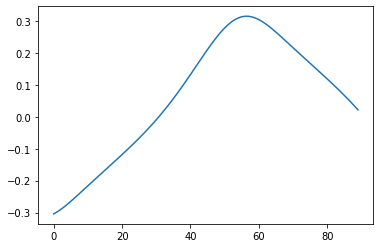

In [69]:
plt.plot(pred)

## Randomer osztály

In [70]:
# ------------------------------------------------------------------------------    # <-- Randomer Class

# Segítség

# Korábban ezt már elég jól megírtam, itt taláható a kód
# https://github.com/JoDeMiro/DeepLearningIntroduction/blob/main/Fun_with_NeuralNet_Part_2.ipynb

# Randomer Class

from numpy.random import RandomState
from copy import deepcopy
import numpy as np


class Randomer():

    def __init__(self, _seed):
        self.seed = _seed
        self.prng = RandomState(1234567890)
        self.debug = False
        self.counter = 0

    def randomize_intercepts(self, intercepts, factor=1000, select_ratio=1.0):
        'Get an MLPRegresson, takes its .intercepts_ and randomize'
        'select_ratio: float -> ha 1.0 akkor mindenki be van választva, ha 0.0 akkor senki (nincs mutáció)'
        _factor = factor
        _intercepts = deepcopy(intercepts)
        for i in range(len(intercepts)):

            modifier = (self.prng.randn(intercepts[i].shape[0]) / factor)
            selector = np.random.rand((modifier.shape[0]))       
            modifier[selector>select_ratio] = 0
            _intercepts[i] = intercepts[i] + modifier  # <-- add new random values to the intercepts (all at once)

        return _intercepts

    def randomize(self, coefs, factor=1000, select_ratio=1.0):
        'Get an MLPRegressor, takes its .coefs_ and randomize'
        self.counter += 1
        _factor = factor
        _coefs = deepcopy(coefs)
        for i in range(len(coefs)):

            modifier = (self.prng.randn(coefs[i].shape[0], coefs[i].shape[1]) /
                        _factor)  # <-- create new random values N(0,1)/factor

            if (self.debug == True):
                print('# ------- c =', self.counter, '------------')
                print('# ------- i =', i, 'layer --------')
                print('------- MODIFIER -------')
                print(modifier)
                print('------- COEFS ---------')
                print(coefs[i])

            # Régi Selector nélküli
            # _coefs[i] = coefs[i] + modifier  # <-- add new random values to the weights (all at once)
            
            # Új Selecor
            selector = np.random.rand(modifier.shape[0], modifier.shape[1])
            modifier[selector>select_ratio] = 0
            
            _coefs[i] = coefs[i] + modifier  # <-- add new random values to the weights (all at once)

            if (self.debug == True):
                print('------- MOD COEFS -----')
                print(_coefs[i])

            # _coefs[i] = coefs[i]                                                        # <-- ha nem akarom módosítani akkor legye egyszerűen csak ez

        return _coefs

## Program

In [71]:
def t():
    return time.time()

In [72]:
data_reader.x_train.shape # kerashoz jó lenne a (990, 10, 1) de scikithez nem
data_reader.x_train = np.squeeze(data_reader.x_train, axis=-1)
data_reader.x_train.shape

(90, 10)

In [73]:
'Egy gyors ránézés teszt mielőtt elindítom a tanítást'

'Egy gyors ránézés teszt mielőtt elindítom a tanítást'

__init__ Trader


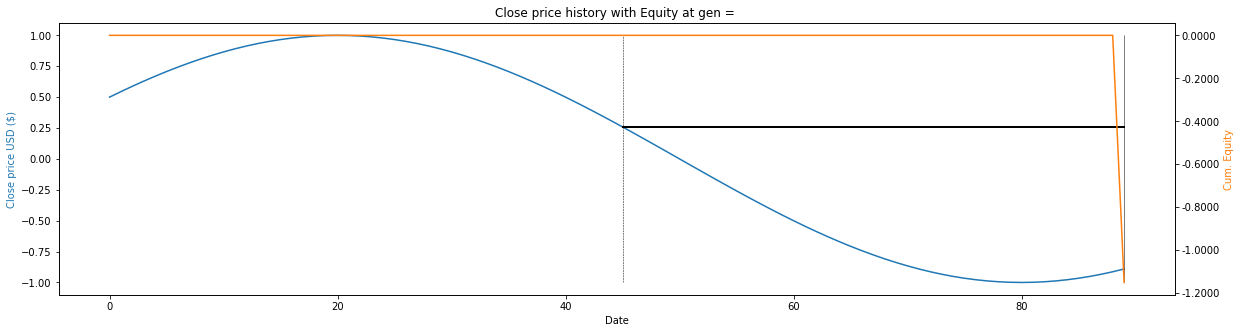

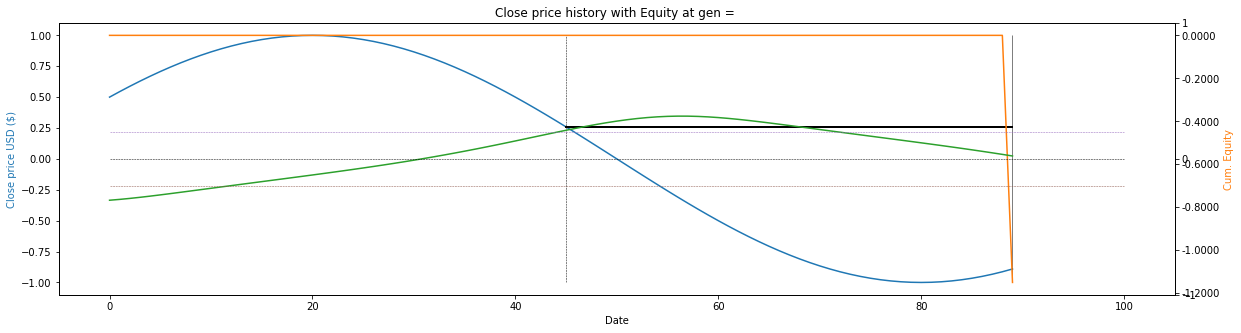

{'buy_count': 1, 'sell_count': 1, 'gain': -1.150825569290888}


{'buy_price': array([0.25881905]),
 'sell_price': array([-0.89100652]),
 'buy_index': array([45]),
 'sell_index': array([89]),
 'trade_length': array([44])}

In [74]:
TRADE_COST = 0.001
THRESHOLD = -0.0
TH = 0.2

trader = Trader(threshold=THRESHOLD,
                data_reader=data_reader,
                trade_cost=TRADE_COST,
                th=TH)


pred = nn.create_prediction()

result = trader.calculator_np(pred)

plot_trade_adv(trader, window=trader.window)

plot_trade_adv(trader, trader_signal=pred, window=trader.window)

print(result)
trader.result

# mlp = deepcopy(nn.mlp)

# best_generation_score = -maxsize
# best_generation_solution = None

# best_individual_solution = None
# best_individual_score = best_generation_score

In [75]:
a = np.array([1,2,3,4,5])

np.any(a==8)



False

In [76]:

TRADE_COST = 0.001
THRESHOLD  = -0.0
TH = 0.2

# Töröljük a korábbi képket

_ = os.system('rm *.png 2> /dev/null')

# Hova tegyüka a thresholdot?

data_reader.x_train[:,0].mean()

# ------------------------------------------------------------------------------    # <-- Test The Program

from sys import maxsize
import time

trader = Trader(threshold=THRESHOLD,
                data_reader=data_reader,
                trade_cost=TRADE_COST,
                th=TH,
                debug=False)

# vvvvvvvvvvvvvvvvvv

internal_ploting = True
repeatable       = True
re_learn         = False

# vvvvvvvvvvvvvvvvvv


if repeatable == True:         # <-- ha azt akarom, hogy mindíg ugyan azt az eredményt kapjam
    np.random.seed(2)

randomer = Randomer(1)         # <-- create a Randomer to controll the mutation




generation = 200               # <----------- genetration (200)
population = 20                # <----------- population  (20)
factor = 100                   # <----------- randomization factor (25) (10)
factor_intercept = 20          # <----------- randomization factor for intercepts_ (1000)
variable_factor  = True
factor_min = 2                 # <----------- if variable_fac then
factor_max = 50                # <------------if variable_vac then
keep_best = True               # <----------- keep_best (False)
print_generation = (False, 1)  # <----------- hiba kereséshez

select_ratio_weight = 1        # <-- 1 = minden súlyt beválaszt a mutációba 0 = egyiket sem
select_ratio_bias = 1          # <-- 1 = mindent biast beválaszt a mutációba 0 = egyiket sem
variable_select_ratio = False
select_ratio_min = 0.2
select_ratio_max = 0.8


print('--------- init_nn() ----------')
print('mlp.coefs_[0][0]\n', mlp.coefs_[0][0])
print('mlp.intercepts_[0]', mlp.intercepts_[0])

# ----------------------------------- Azt hiszem az egészre már csináltam egy új osztályt de most ezt leteszteljük

start_time = time.time()

coefs = deepcopy(mlp.coefs_)
intercepts = deepcopy(mlp.intercepts_)

backup_mlp = deepcopy(mlp)
working_mlp = deepcopy(mlp)

# ------------------------------------ Dirty hack - ha tovább akarom tanítani akkor

if re_learn == True:
    coefs = deepcopy(best_generation_solution.coefs_)
    intercepts = deepcopy(best_generation_solution.intercepts_)
    backup_mlp = deepcopy(best_generation_solution)
    working_mlp = deepcopy(best_generation_solution)

# ------------------------------------

best_generation_score = -maxsize
best_generation_solution = None

generation_holder = []
population_holder = []
best_indiv_holder = []
best_score_holder = []

have_found = 0

generation_run_time = []
_rt_ss  = []
_prt_ss = []
_tt_ss  = []

for i in range(generation):  # <-- generation part
    
    # Randomize the factor
    if variable_factor:
        factor_weight = (np.random.uniform(low=factor_min, high=factor_max))
        factor_intercept = (np.random.uniform(low=factor_min, high=factor_max))
    
    # Randomize the selection ratio
    if variable_select_ratio:
        select_ratio_weight = (np.random.uniform(low=select_ratio_min, high=select_ratio_max))
        select_ratio_bias = (np.random.uniform(low=select_ratio_min, high=select_ratio_max))
    
    # Mutatja az idő múlását
    if (i % 100 == 0):
        print(i)
    
    best_individual_solution = None
    best_individual_score = best_generation_score

    population_holder = []
    best_indiv_holder = []

    _rt_s  = []
    _prt_s = []
    _tt_s  = []

    g_rt_s = time.time()
    for j in range(population):  # <-- population part
        _r = t()
        if (keep_best == True):
            if (j == 0):
                a = coefs
                b = intercepts
                # pass
            else:
                a = randomer.randomize(coefs,
                                       factor=factor_weight,
                                       select_ratio=select_ratio_weight)
                b = randomer.randomize_intercepts(intercepts,
                                                  factor=factor_intercept,
                                                  select_ratio=select_ratio_bias)
        else:
            a = randomer.randomize(coefs,
                                   factor=factor_weight,
                                   select_ratio=select_ratio_weight)
            b = randomer.randomize_intercepts(intercepts,
                                              factor=factor_intercept,
                                              select_ratio=select_ratio_bias)
        # --> vége a súlymutációnak

        working_mlp.coefs_ = a  # <-- assigne randomized coefs to the working_model
        working_mlp.intercepts_ = b  # <-- assigne randomized intc to the working_model

        _rt_s.append((t() - _r))

        
        # számolja ki a becslést
        _p = t()
        pred = working_mlp.predict(data_reader.x_train)
        _prt_s.append((t() - _p))
        
        
        # mérje vissza a hibát, számolja ki a keresekedéseket
        _t = t()
        # loop vagy np
        # result = trader.calculator_ff(pred)      # <-- for loop (slow) (legacy)
        result = trader.calculator_np(pred)        # <-- numpy (fast)
        _tt_s.append((t() - _t))

        if result['buy_count'] != 0:
            score = result[
                'gain']                     # <-- csak akkor kapja meg az értéket ha volt vétel            
        else:
            score = -maxsize                # <-- egyébkként -maxsize (-9223372036854775807)

        # mindíg tartsa észbe, hogy ki volt a legjobb -> ezt tárolja le
        if (score > best_individual_score
            ):                              # mivel maximalizálni akarunk ezért 'score > best_score'
            best_individual_score = score
            best_individual_solution = deepcopy(working_mlp)
            print('new best_solution find individual = ', j)
            print('i =', i, 'j =', j, '\tscore = ', score)

        # az éppen aktuális egyed score értékét tegyük el
        population_holder.append(score)

    _tt_sum = sum(_tt_s)
    _tt_ss.append(_tt_sum)

    _rt_sum = sum(_rt_s)
    _rt_ss.append(_rt_sum)

    _prt_sum = sum(_prt_s)
    _prt_ss.append(_prt_sum)

    g_rt_e = time.time()
    g_rt = g_rt_e - g_rt_s
    generation_run_time.append(g_rt)

    # generációnként tároljuk le a legjobb egyed score érétkét
    best_score_holder.append(best_individual_score)

    # nyomonkövetés céljából tegyük le egy adott generáció összes egyedének scorját is
    generation_holder.append(population_holder)

    if (print_generation[0]):
        if (i % print_generation[1] == 0):
            print('best_score in generation i = ', i, ' = ',
                  best_individual_score)

    # ha a generáció legjobbja jobb mint a korábbi generáció legjobbja akkor csapja felül
    if (best_individual_score > best_generation_score):
        best_generation_score = best_individual_score
        best_generation_solution = deepcopy(best_individual_solution)
        found_better_in_generation = True
        # A generáció legjobbját tegyük le a coef változóba -> ezáltal a következő generációban ő lesz az ami alapján elindul a mutáció
        coefs = deepcopy(best_generation_solution.coefs_)
        intercepts = deepcopy(best_generation_solution.intercepts_)

        print('best_score in generation i = ', i, ' = ', best_individual_score)
        
        
        # ------------------------------------------------------------------->
        # Az Eq animációhoz

        if internal_ploting:
            # --------------------------------------------------------------->
            # Az Eq animációhoz

            replayed_pred = best_generation_solution.predict(data_reader.x_train)
            _ = trader.calculator_np(replayed_pred) # szükséges, felülcsaja a traderben a dolgokat

            have_found += 1
            plot_trade_adv(trader, save = True, j = have_found, g=i, window=trader.window)
            
    # Save periodicaly
    if (i % 500 == 0):
        joblib.dump(best_generation_solution, 'model.joblib')       # <-- elmenjük
        # clf = joblib.load('model.joblib')                         # <-- betöltjük


    # A kötések hosszának eloszlásat akarom időnként látni
    if (i % 500 == 0):
        trd_time = trader.result['sell_index'] - trader.result['buy_index']
        trd_time = trd_time.astype('int')
        _ = np.unique(trd_time, return_counts=True)
        print(_)

# A globalisan legjobb megoldás alapján csináljuk meg a becslést
test_pred = best_generation_solution.predict(
    data_reader.x_train)  # <-- kiértékeléshez és vizualizációhoz

# A backup_mlp alapján kiszámolhatom, hogy imlyen volt a becslés eredetileg
test_pred_initial = backup_mlp.predict(
    data_reader.x_train
)  # > ha később össze akarom vetni valamelyik mutációval

# Ezek kellenek a plottoláshoz
# generation_holder, best_score_holder, best_generation_solution


# Végül minden esetben updateljük a trader.reult-ot azáltal, hogy meghívjuk a következőt
replayed_pred = best_generation_solution.predict(data_reader.x_train)
replayed_result = trader.calculator_np(replayed_pred)

print('\n', replayed_result)

# Mérjük meg, hogy mennyi ideig fut
running_time = time.time() - start_time
print('\nrunning_time = {:.2f}'.format(running_time))

__init__ Trader
--------- init_nn() ----------
mlp.coefs_[0][0]
 [ 0.25598723 -0.38515148  0.08647721  0.21419255 -0.43488398  0.18165314
 -0.31853789  0.21065089 -0.260351    0.11248673  0.04508636 -0.28334618
 -0.46488225  0.28923017  0.23254417]
mlp.intercepts_[0] [-3.31844205e-08  2.65531916e-08 -2.44938061e-08  1.62791594e-08
  3.90815025e-08 -5.64052662e-08  2.21235013e-08  1.23247599e-08
 -5.82400972e-09  5.63281510e-08 -1.68293468e-08 -5.86808291e-09
  1.66673653e-09 -5.60225217e-08 -2.64234625e-08]
0
new best_solution find individual =  0
i = 0 j = 0 	score =  -1.150825569290888
new best_solution find individual =  5
i = 0 j = 5 	score =  -0.39200652418836773
best_score in generation i =  0  =  -0.39200652418836773
(array([29]), array([1]))
new best_solution find individual =  5
i = 1 j = 5 	score =  -0.3473674891733408
best_score in generation i =  1  =  -0.3473674891733408
new best_solution find individual =  2
i = 2 j = 2 	score =  0.059049992106786076
best_score in generat

In [77]:

create_animated_mp4('price*.png', framerate=1, quite=True)


ok


## Calc trade lenght

Megtehetem mert a trader buy_index sell_index alapján

In [78]:
trader.result

{'buy_price': array([ 0.5       , -0.99862953]),
 'sell_price': array([ 0.99862953, -0.89100652]),
 'buy_index': array([ 0, 81]),
 'sell_index': array([19, 89]),
 'trade_length': array([19,  8])}

min 8
max 19
avg 13.5
std 5.5


(array([ 8, 19]), array([1, 1]))

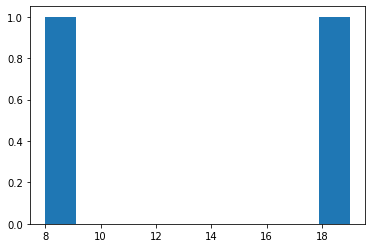

In [79]:

plt.hist(trader.result['trade_length'])

print('min', trader.result['trade_length'].min())
print('max', trader.result['trade_length'].max())
print('avg', trader.result['trade_length'].mean())
print('std', trader.result['trade_length'].std())

_ = np.unique(trader.result['trade_length'], return_counts=True)
_

In [80]:
# a trader.calculator zabálja az időt

print('{:0.4f} sec \t total time'.format(sum(generation_run_time)))   # total time

print('{:0.4f} sec \t mlp pred'.format(sum(_prt_ss)))  # mlp pred
print('{:0.4f} sec \t randomer'.format(sum(_rt_ss)))   # randomer
print('{:0.4f} sec \t trader'.format(sum(_tt_ss)))     # trader     result = trader.calculator(pred)   

1.3381 sec 	 total time
0.4112 sec 	 mlp pred
0.3419 sec 	 randomer
0.5661 sec 	 trader


In [81]:
# a trader.calculator zabálja az időt

print('{:0.4f} sec \t total time'.format(sum(generation_run_time)))   # total time

print('{:0.4f} sec \t mlp pred'.format(sum(_prt_ss)))  # mlp pred
print('{:0.4f} sec \t randomer'.format(sum(_rt_ss)))   # randomer
print('{:0.4f} sec \t trader'.format(sum(_tt_ss)))     # trader     result = trader.calculator(pred)   

1.3381 sec 	 total time
0.4112 sec 	 mlp pred
0.3419 sec 	 randomer
0.5661 sec 	 trader


In [82]:
'Semmi célom nem volt vele csak ellenőrzés, az mlp archra voltam kíváncsi'

print(mlp.get_params()['hidden_layer_sizes'], '\t mlp arch')
print(nn.mlp.get_params()['hidden_layer_sizes'], '\t nn.mlp, arch')
print(trader.threshold, '\t\t trader threshold')

(15, 5) 	 mlp arch
(15, 5) 	 nn.mlp, arch
-0.0 		 trader threshold


min 0.005934
max 0.009917
avg 0.006690


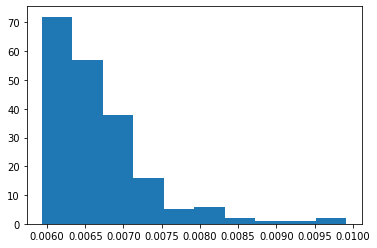

In [83]:
generation_run_time = np.array(generation_run_time)
plt.hist(generation_run_time)
print('min {:0.6f}'.format(generation_run_time.min()))
print('max {:0.6f}'.format(generation_run_time.max()))
print('avg {:0.6f}'.format(generation_run_time.mean()))

min 0.005934
max 0.009917
avg 0.006690


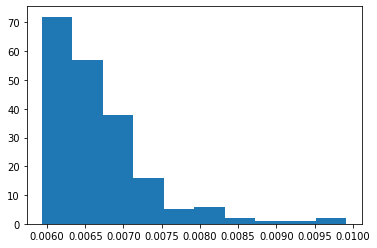

In [84]:
generation_run_time = np.array(generation_run_time)
plt.hist(generation_run_time)
print('min {:0.6f}'.format(generation_run_time.min()))
print('max {:0.6f}'.format(generation_run_time.max()))
print('avg {:0.6f}'.format(generation_run_time.mean()))

In [85]:
# Nos ha már az ember rááldozott egy csomó időt, hogy tanítsa a modelt, akkor talán illene azt elmenteni

# Save As ...

import pickle
import joblib
import json

joblib.dump(best_generation_solution, 'model.joblib')       # <-- elmenjük
clf = joblib.load('model.joblib')                           # <-- betöltjük

print(type(clf))

joblib.dump(trader, 'trader.joblib')
backup_trader = joblib.load('trader.joblib')

print(type(backup_trader))

joblib.dump(generation_holder, 'generation_holder.joblib')
backup_generation_holder = joblib.load('generation_holder.joblib')

print(type(backup_generation_holder))

<class 'sklearn.neural_network._multilayer_perceptron.MLPRegressor'>
<class '__main__.Trader'>
<class 'list'>


test_pred.shape = (90,)


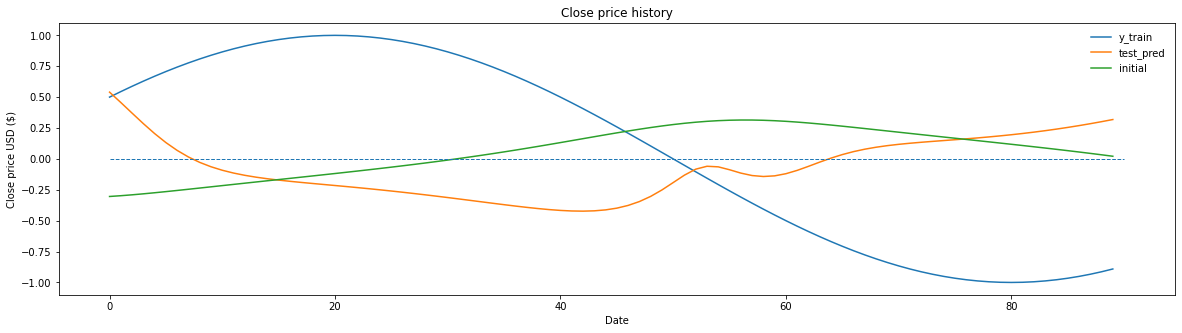

In [86]:
print('test_pred.shape =', test_pred.shape)

plt.figure(figsize=(20,5))
plt.title('Close price history')
plt.plot(data_reader.y_train, label = 'y_train')
plt.plot(test_pred, label = 'test_pred')
plt.plot(test_pred_initial, label = 'initial')
plt.xlabel('Date')
plt.ylabel('Close price USD ($)')
plt.hlines(trader.threshold, 0, data_reader.y_train.size, lw = 1, linestyles='dashed')
plt.legend(frameon=False)
plt.show()

In [87]:
# A képlet viszonylag egyszerű

# A Trader osztályban a result ( a return és a self is )
# gyakorlatilag az data_reader.y_train el szinkronban indexál

# Ez azt jelenti, hogy a trader önmagán belül mindenhol konzisztens

# Viszont a window hosszával rövidebb a data_reader.dataset adatainál

# Ezért tehát
# ezt mindenkor figyelembe kell venni amikor a két adatsor közötti művelet van
# vagy amikor a leszármazotjaik között művelet van (pl. trader.result)

In [88]:
print(type(trader.result))               # -- <class 'dict'>
print(trader.result.keys())              # -- dict_keys(['buy_price', 'sell_price', 'buy_index', 'sell_index'])
print(len(trader.result['buy_price']))   # -- numpy array a vételi árakkal


'''
A trader.result tartalmazza a vétli és eladási árakat és a hozzájuk tartozó indexet is
Ezt az index értéket a data_loader.y_train alapján kell figyelembe venni ahoz tartoznak
A teljes idősor, a data_loader.dataset biztos hogy hosszab és az indexek nem egyeznek
Hiszen a data_loader.y_train a window hosszával rövidebb
'''

# Tehát

'''
Például a trader.result[\'buy_index\'][0] -> 29, az a data_reader.y_train[29]
viszont a data_reader.dataset[29] helyett a data_reader.dataset[39] a
hozzá tartozó helyes érték, ha a window size = 10 volt.
'''
''


<class 'dict'>
dict_keys(['buy_price', 'sell_price', 'buy_index', 'sell_index', 'trade_length'])
2


''

In [89]:
# Az eltérés a teljes és a tanuló adatok között

# Az elérés oka a visszatekintő ablak (window) hossza

print(data_reader.dataset.shape[0])

print(data_reader.y_train.shape[0])

100
90


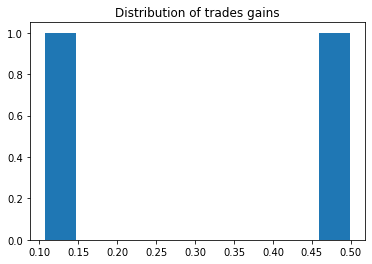

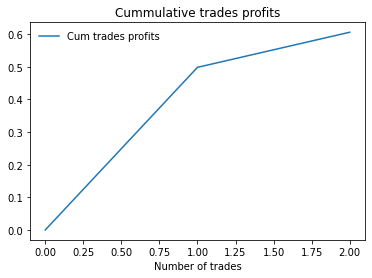

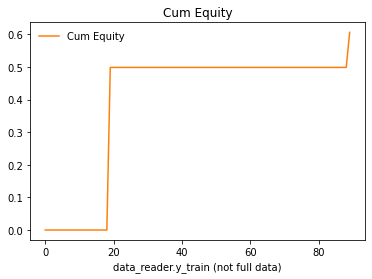

In [90]:

# Nos itt jön az első érdekesség.

# Itt számolom ki ugyanis elöször az egyes tradeken keletkezett nyereséget.
# Ezt ráadáusl úgy teszem, hogy itt már a Trader osztályban eltárol
# sell_price - buy_price alapján számolok

# A trader.result értékét újra lehet számolni ha meghívom
# a trader.calculator_np(replayed_pred)
# a trader.calculator(best_generation_solution.predict(data_reader.x_train))

# Tehát

# Eddig elméletben minden szinkronban van.
# Az adatok majd csak ott csúsznak el amikor a Equity-t egy ábrára teszem
# a tényleges árfolyammal, mert a tényleges árfolyam hosszabb a tanuló
# árfolyamnál méghozzás a visszatekintő ablak hosszávval.

trades_profit = trader.result['sell_price'] - trader.result['buy_price']
# print(trades_profit)

# ------------------------------------------------------------------------------

plt.hist(trades_profit)  # ez az egyik amit majd szeretnék
plt.title('Distribution of trades gains')
plt.show()

# ------------------------------------------------------------------------------

# cum profit (equity)

cum_profit = [0]
for i in range(len(trades_profit)):
    cum_profit.append(cum_profit[i] + trades_profit[i])

# cum_profit = np.cumsum(trade_profit)

plt.plot(cum_profit, label='Cum trades profits')
plt.title('Cummulative trades profits')
plt.xlabel('Number of trades')
plt.legend(frameon=False)
plt.show()

# ------------------------------------------------------------------------------

# cum profit (equity) az idősoron - csak az equity

# eq = np.zeros(data_reader.dataset.shape[0])               # <-- dataset.shape[0] helyett
eq = np.zeros(data_reader.y_train.shape[0])                 # <-- y_train.shape[0]

# Tehát innentől fogva az Equity a data_reader.y_train hosszával lesz azonos hosszú és nem a datasettel.

assert eq.shape[0] == data_reader.y_train.shape[0]
assert eq.shape[0] != data_reader.dataset.shape[0]

#

# -------------------------------------------------

# Az eq kiszámolása itt történik meg

# erre már nincs is szükség a traderben van

# -------------------------------------------------

for i in range(len(trader.result['sell_price'])):        # <-- lehet a sell_price hossza, de lehet más is
    sell_index = trader.result['sell_index'][i]
    sell_index = int(sell_index)
    eq[sell_index:] = cum_profit[i + 1]
    
# -------------------------------------------------



plt.plot(eq, color='C1', label='Cum Equity')
plt.title('Cum Equity')
plt.xlabel('data_reader.y_train (not full data)')
plt.legend(frameon=False)
plt.show()

# ------------------------------------------------------------------------------

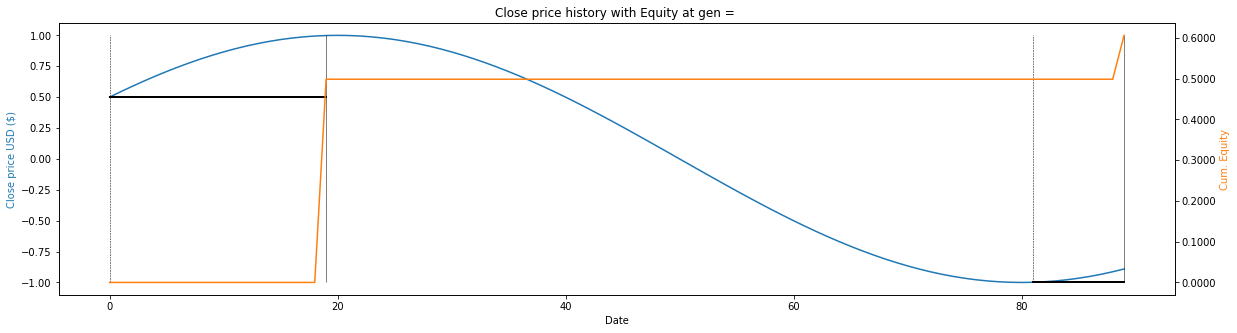

In [91]:

plot_trade_adv(trader, window=trader.window)


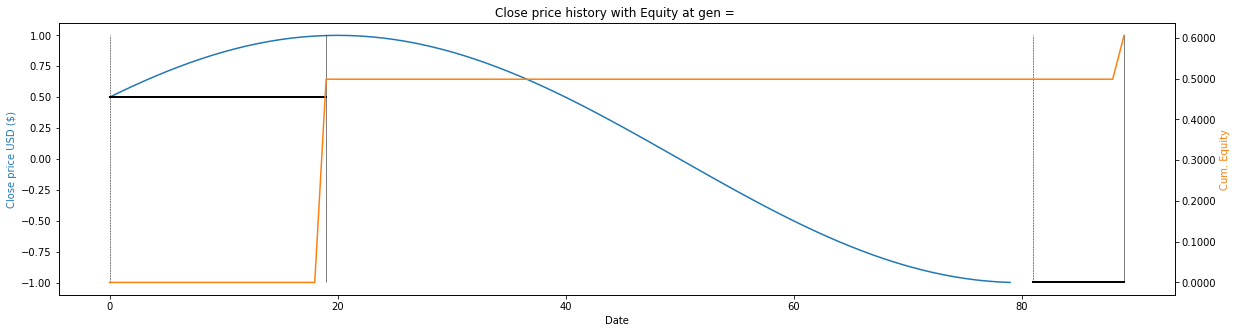

In [92]:

plot_trade_adv(trader, _from=0, _back=10, window=trader.window)


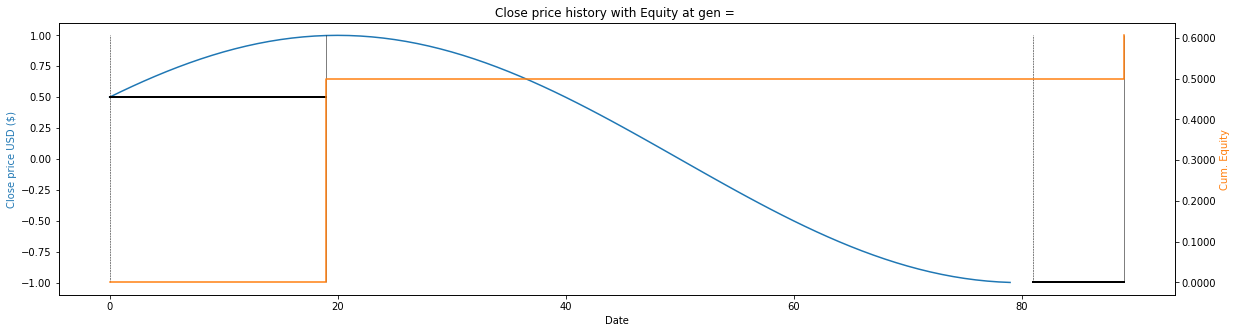

In [93]:

plot_trade_adv(trader, _from=0, _back=10, window=trader.window, step=True)


In [94]:
_from   = IntSlider(min=0, max=1200, step=1, value=0, description='start')
_back   = IntSlider(min=0, max=1200, step=1, value=0, description='back')
_window = IntSlider(min=-10, max=trader.window, step=1, value=trader.window, description='window')
_step   = Checkbox(value=True, description='step')
_trd    = fixed(trader)

ui = ipywidgets.HBox([_from, _back, _window, _step])
params = {'trader': _trd, '_from': _from, '_back': _back, 'window': _window, 'step': _step}
out = ipywidgets.interactive_output(plot_trade_adv, params)
display(ui, out)

Output()

In [95]:
def plot_int(start=0, end=-1, p=True, i=True):

    plt.figure(figsize=(20,5))
    plt.title('Y value history')
    plt.plot(data_reader.y_train[start:end], label = 'y_train')
    if p:
        plt.plot(test_pred[start:end], label = 'test_pred')
    if i:
        plt.plot(test_pred_initial[start:end], label = 'initial')
    plt.xlabel('Time')
    plt.ylabel('Y value')
    plt.hlines(trader.threshold, 0, data_reader.y_train.size-(start-end), lw = 1, linestyles='dashed')
    plt.legend(frameon=False)
    plt.show()

start = IntSlider(min=0, max=1200, step=1, value=0, description='start')
end   = IntSlider(min=-1200, max=-1, step=1, value=1, description='end')

p     = Checkbox(description='predicted', value=True)
i     = Checkbox(description='initial', value=True)

ui = ipywidgets.HBox([start, end, p, i])
out = ipywidgets.interactive_output(plot_int, {'start': start, 'end': end, 'p': p, 'i': i})
display(ui, out)


Output()

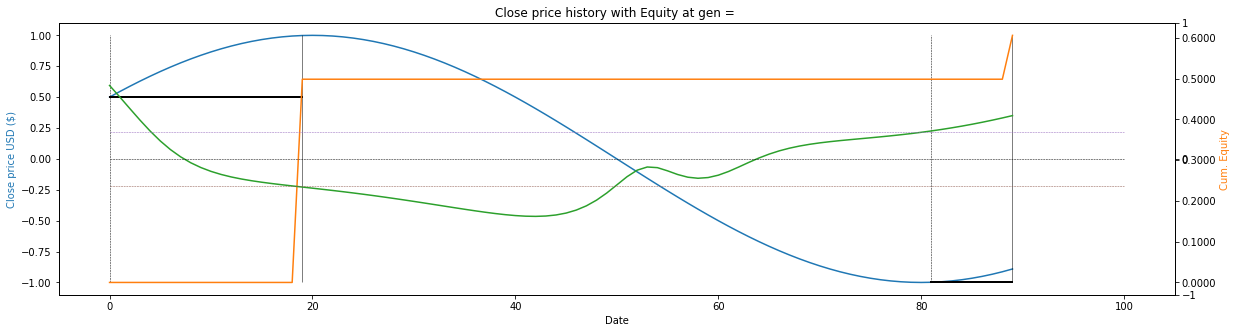

In [96]:
# test_pred -> (ami tulajdonképpen a signal alapja) tanításnál lett kiszámolva

plot_trade_adv(trader, trader_signal=test_pred, window=trader.window)

In [97]:
trader.buy_idx
trader.sell_idx
trader.result['buy_index']
trader.result['sell_index']
trader.result['buy_price']
trader.result['sell_price']

array([ 0.99862953, -0.89100652])

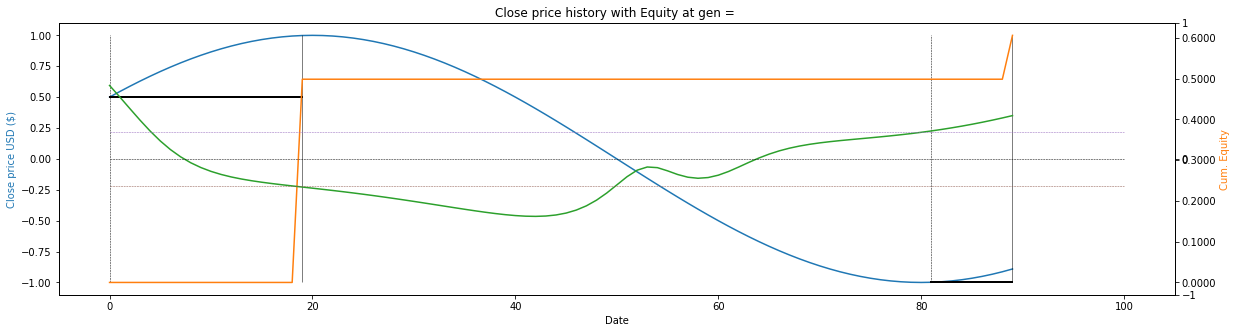

In [98]:
plot_trade_adv(trader, trader_signal=test_pred, window=trader.window, _from=0, _back=0)

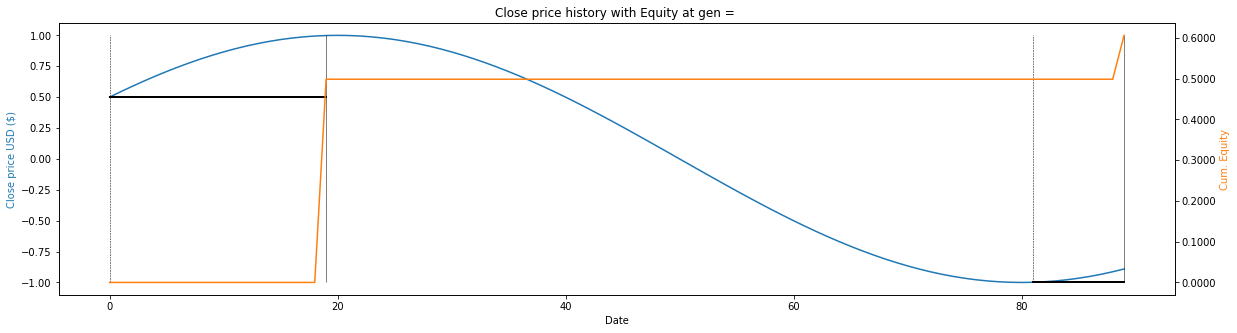

In [99]:
plot_trade_adv(trader, window=trader.window, _from=0, _back=0)

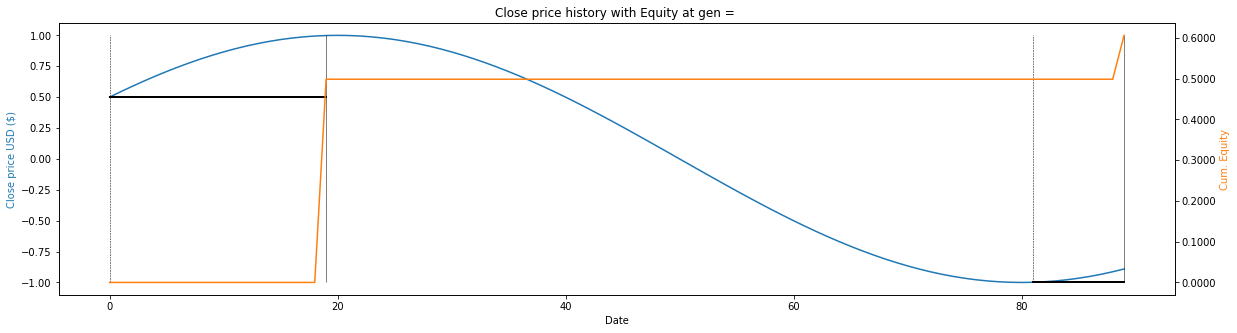

In [100]:
plot_trade_adv(trader, window=trader.window)

## Plotter osztály

In [101]:
# ToDo:

# Be kéne tennem (?) a plotter osztály alá?

import os

os.system('rm MLPPlot.py')
os.system('wget https://raw.githubusercontent.com/JoDeMiro/Micado-Research/main/MLPPlot.py 2> /dev/null')


import importlib
import MLPPlot
importlib.reload(MLPPlot)


def vshow(_net):
    net = _net                                                     # <- a best_solution
    num_input_varialbe = ['X']
    num_input_varialbe = ['X'+str(i) for i in range(30)]
    num_input_varialbe = ['X'+str(i) for i in range(net.coefs_[0].shape[0])] # <- mlp.coefs_[0].shape[0] a bemenetek száma

    # Define the structure of the network
    network_structure = np.hstack(([len(num_input_varialbe)], np.asarray(net.hidden_layer_sizes), [1]))

    print(network_structure)

    # Draw the Neural Network with weights
    network = MLPPlot.DrawNN(network_structure, net.coefs_, num_input_varialbe)
    network.draw(line_width=1)

## Visualise net - Best Solution

[10 15  5  1]


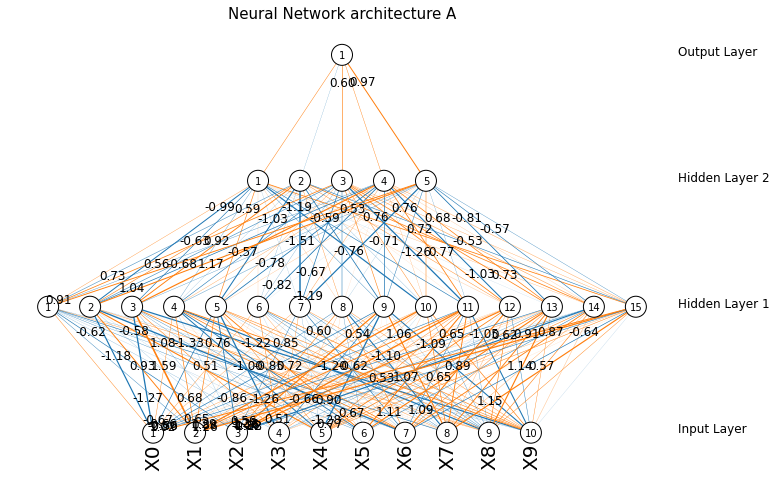

In [102]:
vshow(best_generation_solution)

## Visualise net - Initial ('Empty') Solution

[10 15  5  1]


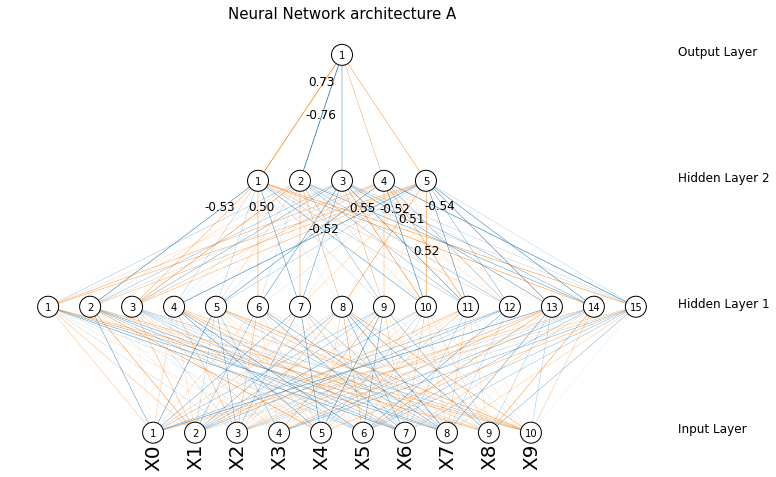

In [103]:
vshow(backup_mlp)


```
# JoDeMiro
```


In [104]:
# ------------------------------------------------------------------------------    # <-- Plotter Class

class Plotter():

  def __init__(self):
    pass


  def plot_generation_scatter(self, generation_holder):

    m = np.zeros((len(generation_holder), len(generation_holder[0])))
    # print(m.shape)

    for i in range(len(generation_holder)):
      for j in range(len(generation_holder[i])):
        m[i, j] = generation_holder[i][j]

    # --- kell csinálni egy [0, 1, 2, ..., 0, 1, 2, ..., 0, 1, 2] vektort is az lesz majd az x -tengely
    n = np.arange(1, len(generation_holder) + 1, 1)
    a = []
    for _ in range(len(generation_holder[0])):
      a.append(n)
    b = np.array(a)
    c = b.flatten()

    # --- ki kell teríteni a mátrixba rakott score-okat és kész is
    s = m.flatten(order='C')
    s = m.flatten(order='F')

    # --- kiszűrni a végelenűl nagyokat (amelyknél nem volt értlemezhető scorre)      # <-- new in v.014

    f = np.zeros(s.shape)                                                             # <-- nincs jobb ötletem, minthogy 0-ra cserélem őket
    f[s > -maxsize + 1] = s[s > -maxsize + 1]

    # --- plot
    # plt.scatter(c, s)
    
    return c, s, f

# ------------------------------------------------------------------------------

  def plot_results(self, _max=None, _show_mid = False):
    if(_show_mid == True):
      fig, (a0, a1, a2) = plt.subplots(1, 3, figsize=(18, 5))
    else:
      fig, (a0, a2) = plt.subplots(1, 2, figsize=(12, 5))
    
    _number_of_generation = len(best_score_holder)
    if (_max == None):
      _number_of_generation = _number_of_generation
    elif (_max > _number_of_generation):
      _number_of_generation = _number_of_generation
    elif (_max < _number_of_generation):
      _number_of_generation = _max

    _x_axis = np.arange(1, _number_of_generation+1, 1)
    a0.scatter(_x_axis, best_score_holder[:_number_of_generation])
    a0.set_ylabel('Means Square Error')
    a0.set_xlabel('Generation')

    c, s, f = self.plot_generation_scatter(generation_holder[:_number_of_generation])

    if(_show_mid == True):
      #a1.plot(generation_holder[:_number_of_generation])
      a1.plot(f[:_number_of_generation])
      
      a1.set_xlabel('Generation')

    # a2.scatter(c, s)    # <-- nem szűrt adatok
    a2.scatter(c, f)    # <-- szűrt adatok

    a2.set_xlabel('Generation')
    plt.show()


200
<class 'list'>
20
<class 'numpy.float64'>
-1.150825569290888


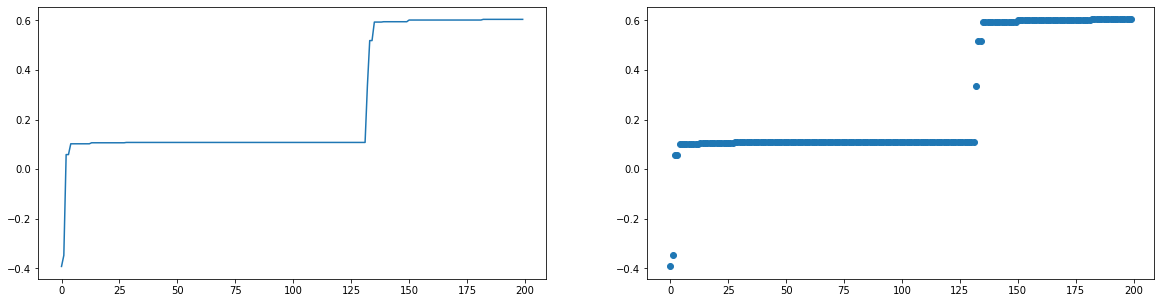

In [105]:
# ------------------------------------------------------------------------------    # <-- egy kis ellenőrzés mert úgy látom baj van.

# Ellenőrzés.
# Minden jó.

print(len(generation_holder))
print(type(generation_holder[0]))
print(len(generation_holder[0]))
print(type(generation_holder[0][0]))
print(generation_holder[0][0])
# print(generation_holder[0])

tmp_best_scores_in_each_generation = []
for i in generation_holder:
    tmp_best_score = -sys.maxsize
    for score in i:
        if (score > tmp_best_score):
            tmp_best_score = score
    tmp_best_scores_in_each_generation.append(tmp_best_score)

fig, (ax0, ax1) = plt.subplots(1, 2, figsize=(20, 5))
ax0.plot(tmp_best_scores_in_each_generation)
x_axis = np.arange(0, len(generation_holder), 1)
ax1.scatter(x_axis, tmp_best_scores_in_each_generation)
plt.show()

# Ellenőrzés.
# Minden jó.

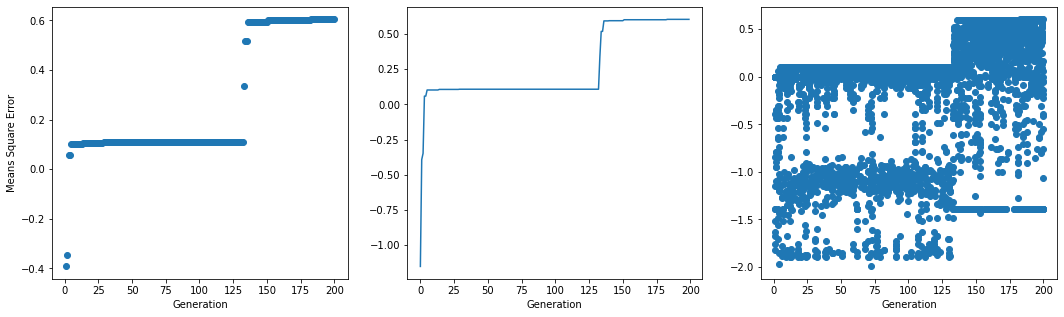

In [106]:
plotter = Plotter()

plotter.plot_results(2000, True)

In [107]:
_max = IntSlider(min=40, max=800, step=1, value=120)

interact(plotter.plot_results, _max=_max, _show_mid=True, _show_avg=True);

interactive(children=(IntSlider(value=120, description='_max', max=800, min=40), Checkbox(value=True, descript…

## Workbench

Fogom a keras által inicializált súlyokat és átviszem egy scikit modelbe.:



## Helpelerek

Segítségek magamnak bizonyos megoldásokhoz, amelyekre korábban nem gondoltam.

In [108]:
# A diff működése

a = np.array([1,3,6,7,8])
b = np.diff(a,n=1,prepend=a[0])         # fontos, hogy a prepend az eredeti sor [0] elemét kapja

print(a)
print(b)

[1 3 6 7 8]
[0 2 3 1 1]


1.0 1.0 1.01


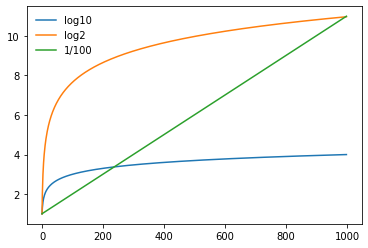

In [109]:
# Memoár

# Emlékeztető magamnak, hogyan súlyozhatnám azt az esetet amikor túl sok tradet csinál.
# Ezt a megoldást egyelőre elvetettem. Helyette bevezettem a `TRADER_COST` változót,
# a túl gyakori és csekély nyereséggel járó kereskedések elkerülésére.

_ = np.arange(1, 1000)
f = np.log10(_) + 1
g = np.log2(_) + 1
h = _ / 100 + 1
plt.plot(f, label='log10')
plt.plot(g, label='log2')
plt.plot(h, label='1/100')
plt.legend(frameon=False)
print(f.min(), g.min(), h.min())


```
# JoDeMiro
```
